In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scs
import seaborn as sns

In [3]:
df = pd.read_csv("customer_data.csv")

# Initial Exploration

In [34]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [35]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


## Categorical Data

In [37]:
# categorial Data
for col in df.columns:
    if df[col].dtype  == 'O':
        print(col,": ",df[col].unique())

gender :  ['Male' 'Female']
education :  ['Bachelor' 'Masters' 'HighSchool' 'College']
region :  ['East' 'West' 'South' 'North']
loyalty_status :  ['Gold' 'Regular' 'Silver']
purchase_frequency :  ['frequent' 'rare' 'occasional']
product_category :  ['Books' 'Clothing' 'Food' 'Electronics' 'Home' 'Beauty' 'Health']


## Numerical Data

In [38]:
for col in df.columns:
    if df[col].dtype  == 'int64':
        print(col,": ",df[col].unique())

id :  [     1      2      3 ...  99998  99999 100000]
age :  [27 29 37 30 31 38 32 24 28 35 21 33 25 22 34 36 40 23 39 20 26 44 19 41
 18 17 42 43 45 16 15 47 13 14 48 46 49 12]
income :  [40682 15317 38849 ... 27092 28552 35207]
purchase_amount :  [18249  4557 11822 ... 23851 20808 18104]
promotion_usage :  [0 1]
satisfaction_score :  [ 6  7  5  3  4  2  8  9  1 10  0]


In [39]:
df.shape

(100000, 12)

## Missing Values

In [40]:
df.isna().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

## Outliers

In [41]:
def Outliers_plotting(df):
    # Create a figure with a 2x2 grid of subplots
    fig, axes = plt.subplots(3, 2, figsize=(12, 10))
    
    # List of variables to plot
    variables = df.select_dtypes(include=['number']).columns
    
    # Plotting each variable in a different subplot
    for ax, var in zip(axes.flat, variables):
        sns.boxplot(data=df, y=var, ax=ax)
        ax.set_title(f'Boxplot of {var}')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

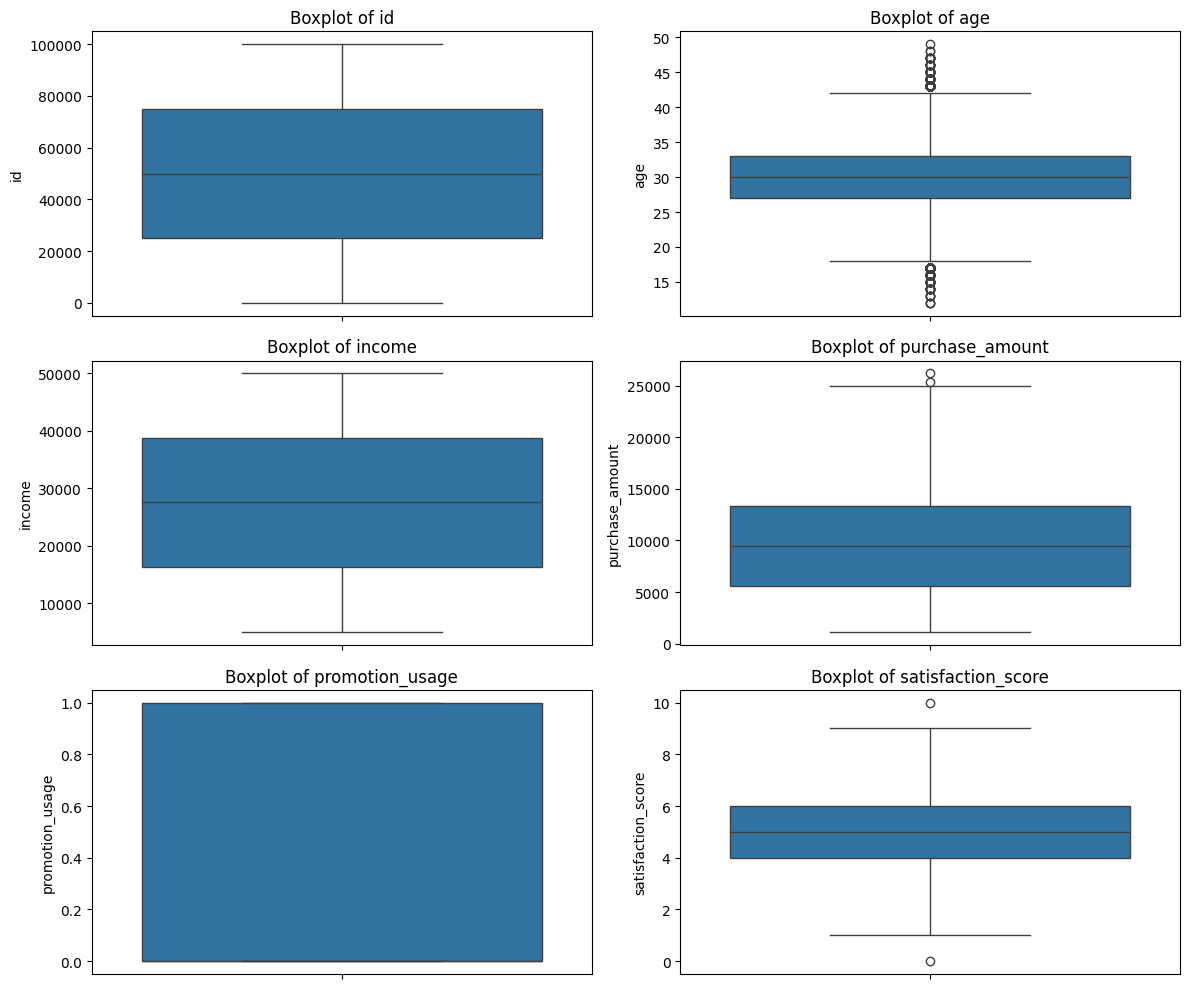

In [42]:
Outliers_plotting(df)

In [43]:
def outlier_trimmer(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_trimmed = df.copy()
    for column in numeric_cols:
        Q1 = df_trimmed[column].quantile(0.25)
        Q3 = df_trimmed[column].quantile(0.75)
        IQR = Q3 - Q1
        minimum = Q1 - 1.5*IQR
        maximum = Q3 + 1.5*IQR
        
        df_trimmed = df_trimmed[(df_trimmed[column] >= minimum) & (df_trimmed[column] <= maximum)]
    return df_trimmed

In [44]:
df_trimmed = outlier_trimmer(df)

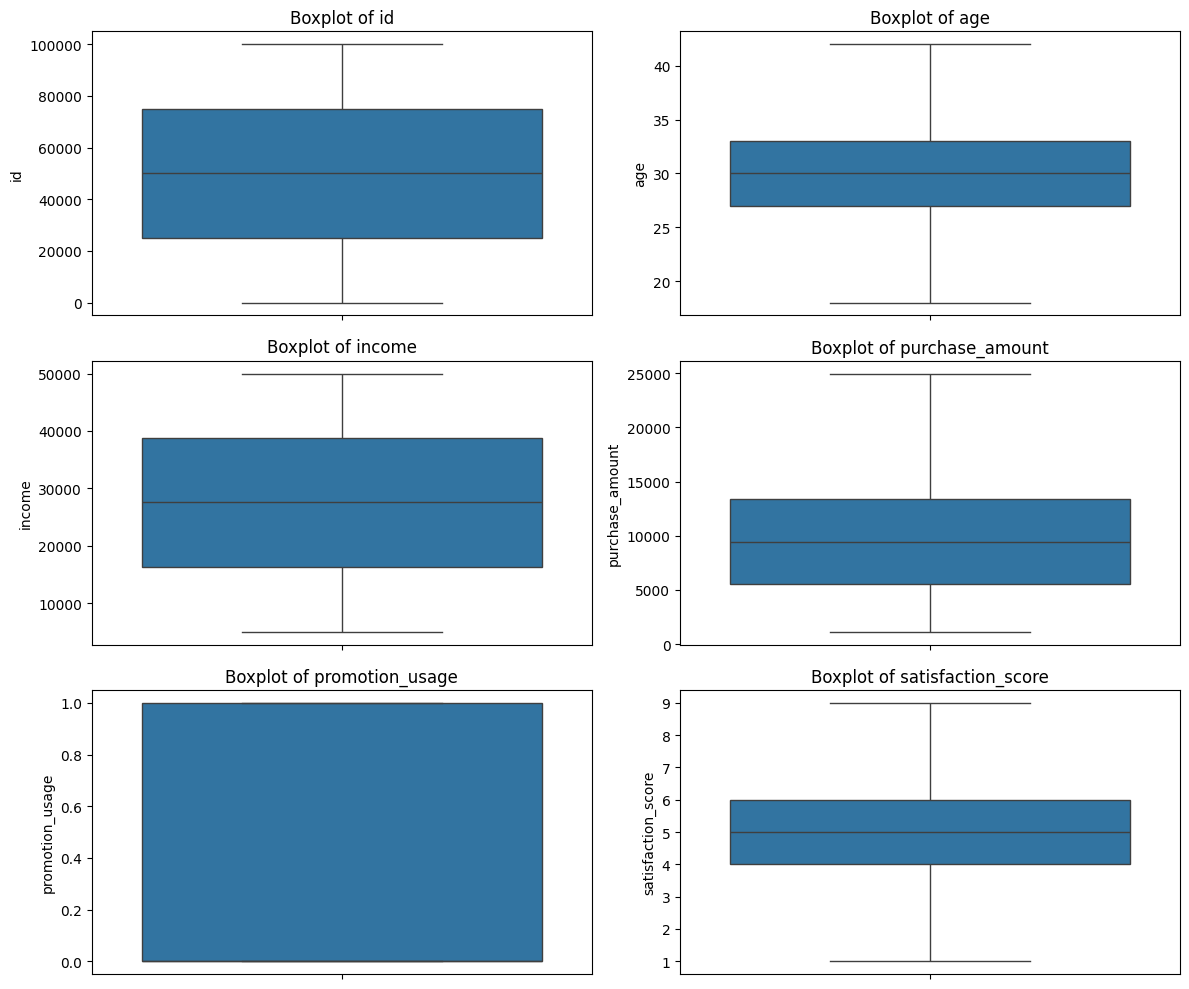

In [45]:
Outliers_plotting(df_trimmed)

# EDA

## Visualize Data

### Distribution

#### Numerica

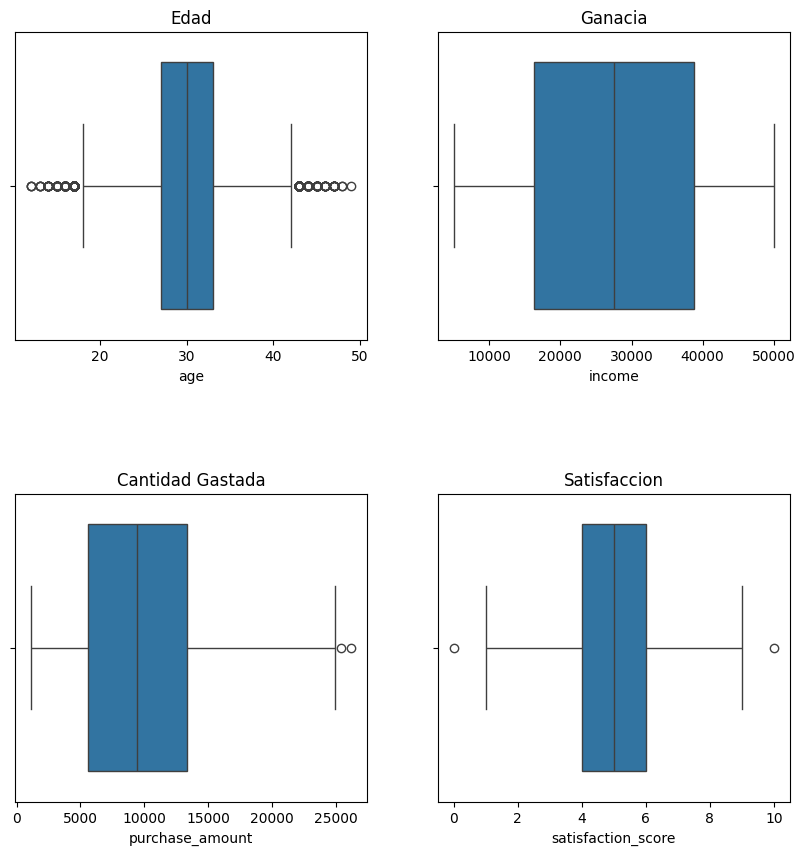

In [5]:
fig,axs =plt.subplots(2,2,figsize=(10,10))
sns.boxplot(data=df, x = "age", ax=axs[0,0])
axs[0, 0].set_title("Edad")    

sns.boxplot(data=df, x = "income" , ax=axs[0,1])
axs[0, 1].set_title("Ganacia")  

sns.boxplot(data=df, x = "purchase_amount" , ax=axs[1,0])
axs[1, 0].set_title("Cantidad Gastada")  

sns.boxplot(data=df, x = "satisfaction_score" ,  ax=axs[1,1])
axs[1, 1].set_title("Satisfaccion")  

# Ajusta el espacio vertical entre las filas
plt.subplots_adjust(hspace=0.5)  # Puedes ajustar este valor según tus preferencias

# Muestra la figura
plt.show()

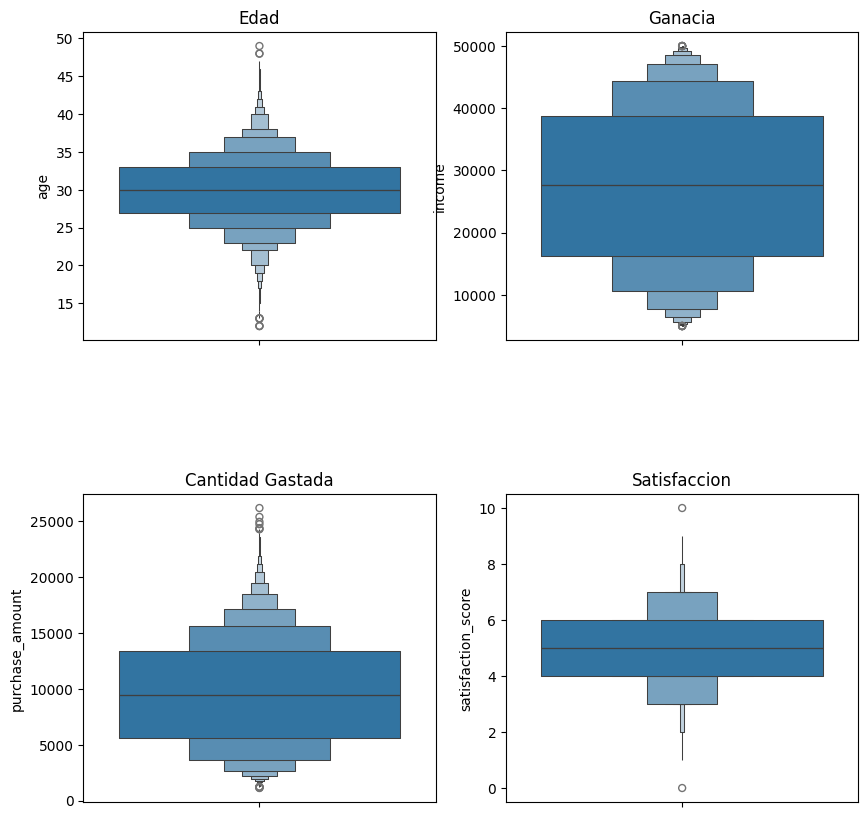

In [6]:
fig,axs =plt.subplots(2,2,figsize=(10,10))
sns.boxenplot(data=df, y = "age", ax=axs[0,0])
axs[0, 0].set_title("Edad")    

sns.boxenplot(data=df, y = "income" , ax=axs[0,1])
axs[0, 1].set_title("Ganacia")  

sns.boxenplot(data=df, y = "purchase_amount" , ax=axs[1,0])
axs[1, 0].set_title("Cantidad Gastada")  

sns.boxenplot(data=df, y = "satisfaction_score" ,  ax=axs[1,1])
axs[1, 1].set_title("Satisfaccion")  

# Ajusta el espacio vertical entre las filas
plt.subplots_adjust(hspace=0.5)  # Puedes ajustar este valor según tus preferencias

# Muestra la figura
plt.show()

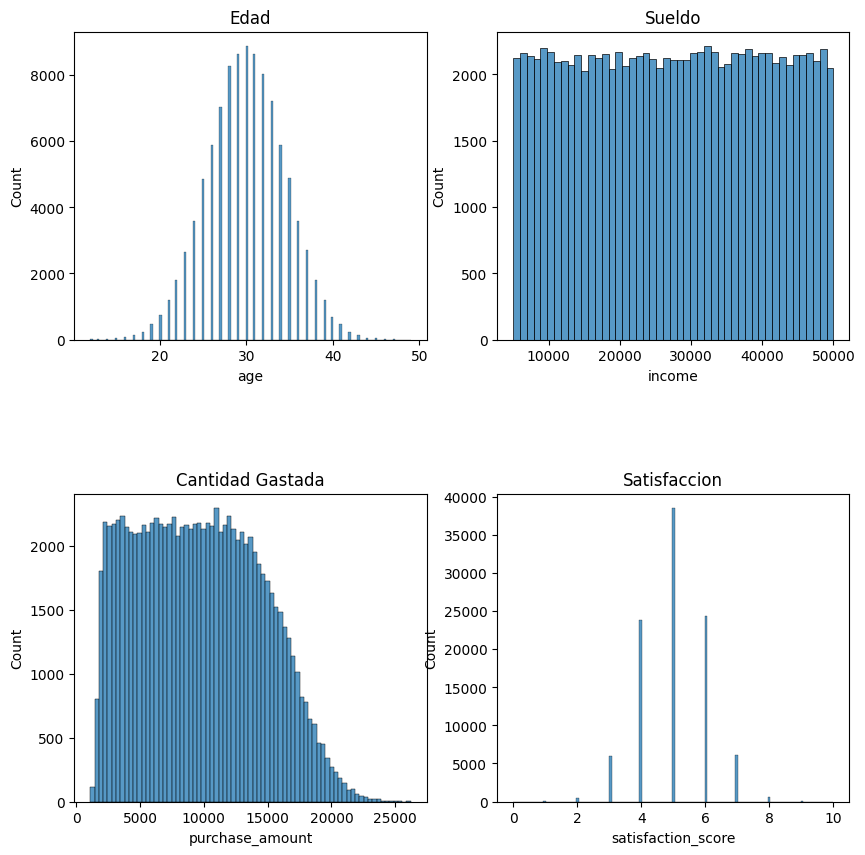

In [7]:
fig,axs =plt.subplots(2,2,figsize=(10,10))
sns.histplot(data=df, x = "age", ax=axs[0,0])
axs[0, 0].set_title("Edad")    

sns.histplot(data=df, x = "income" , ax=axs[0,1])
axs[0, 1].set_title("Sueldo")  

sns.histplot(data=df, x = "purchase_amount" , ax=axs[1,0])
axs[1, 0].set_title("Cantidad Gastada")  

sns.histplot(data=df, x = "satisfaction_score" ,  ax=axs[1,1])
axs[1, 1].set_title("Satisfaccion")  

# Ajusta el espacio vertical entre las filas
plt.subplots_adjust(hspace=0.5)  # Puedes ajustar este valor según tus preferencias

# Muestra la figura
plt.show()

#### Categorica

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20536\3101138552.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2, 1].set_xticklabels(df["product_category"].unique(), rotation=60)


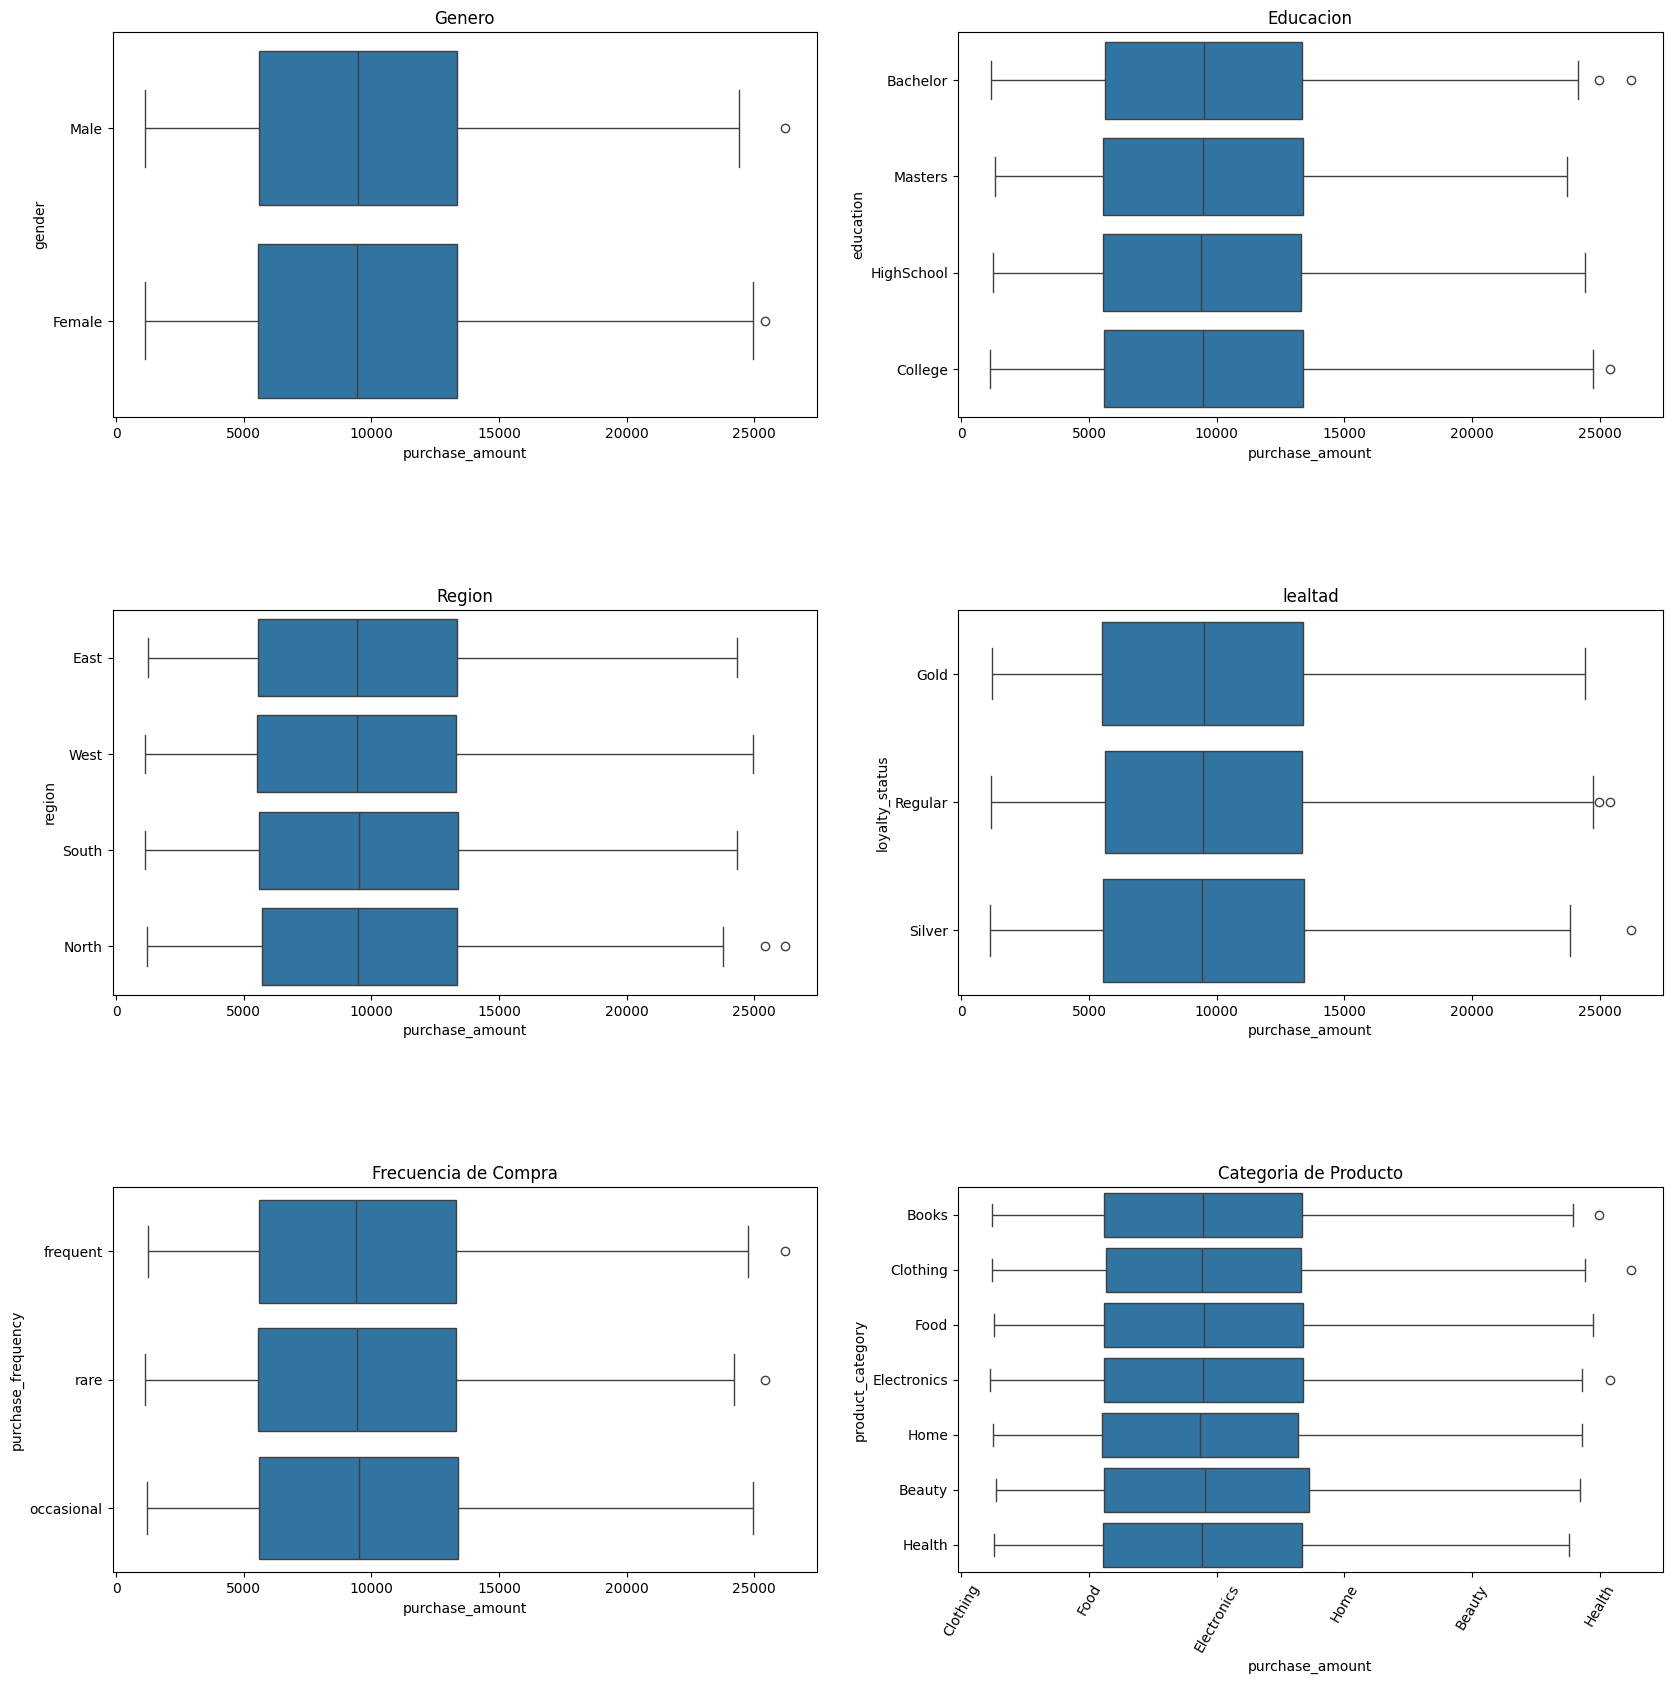

In [49]:
fig,axs =plt.subplots(3,2,figsize=(20,20))
sns.boxplot(data=df, y = "gender", x="purchase_amount" , ax=axs[0,0])
axs[0, 0].set_title("Genero")    

sns.boxplot(data=df, y = "education" , x="purchase_amount", ax=axs[0,1])
axs[0, 1].set_title("Educacion")  

sns.boxplot(data=df, y = "region" , x="purchase_amount" , ax=axs[1,0])
axs[1, 0].set_title("Region")  

sns.boxplot(data=df, y = "loyalty_status" , x="purchase_amount" , ax=axs[1,1])
axs[1, 1].set_title("lealtad")  

sns.boxplot(data=df, y = "purchase_frequency" , x="purchase_amount" , ax=axs[2,0])
axs[2, 0].set_title("Frecuencia de Compra")  

sns.boxplot(data=df, y = "product_category" , x="purchase_amount" , ax=axs[2,1])
axs[2, 1].set_title("Categoria de Producto")  

# Ajusto categorias del eje x
axs[2, 1].set_xticklabels(df["product_category"].unique(), rotation=60)

# Ajusta el espacio vertical entre las filas
plt.subplots_adjust(hspace=0.5)  # Puedes ajustar este valor según tus preferencias

# Muestra la figura
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20536\3660518018.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2, 1].set_xticklabels(df["product_category"].unique(), rotation=60)


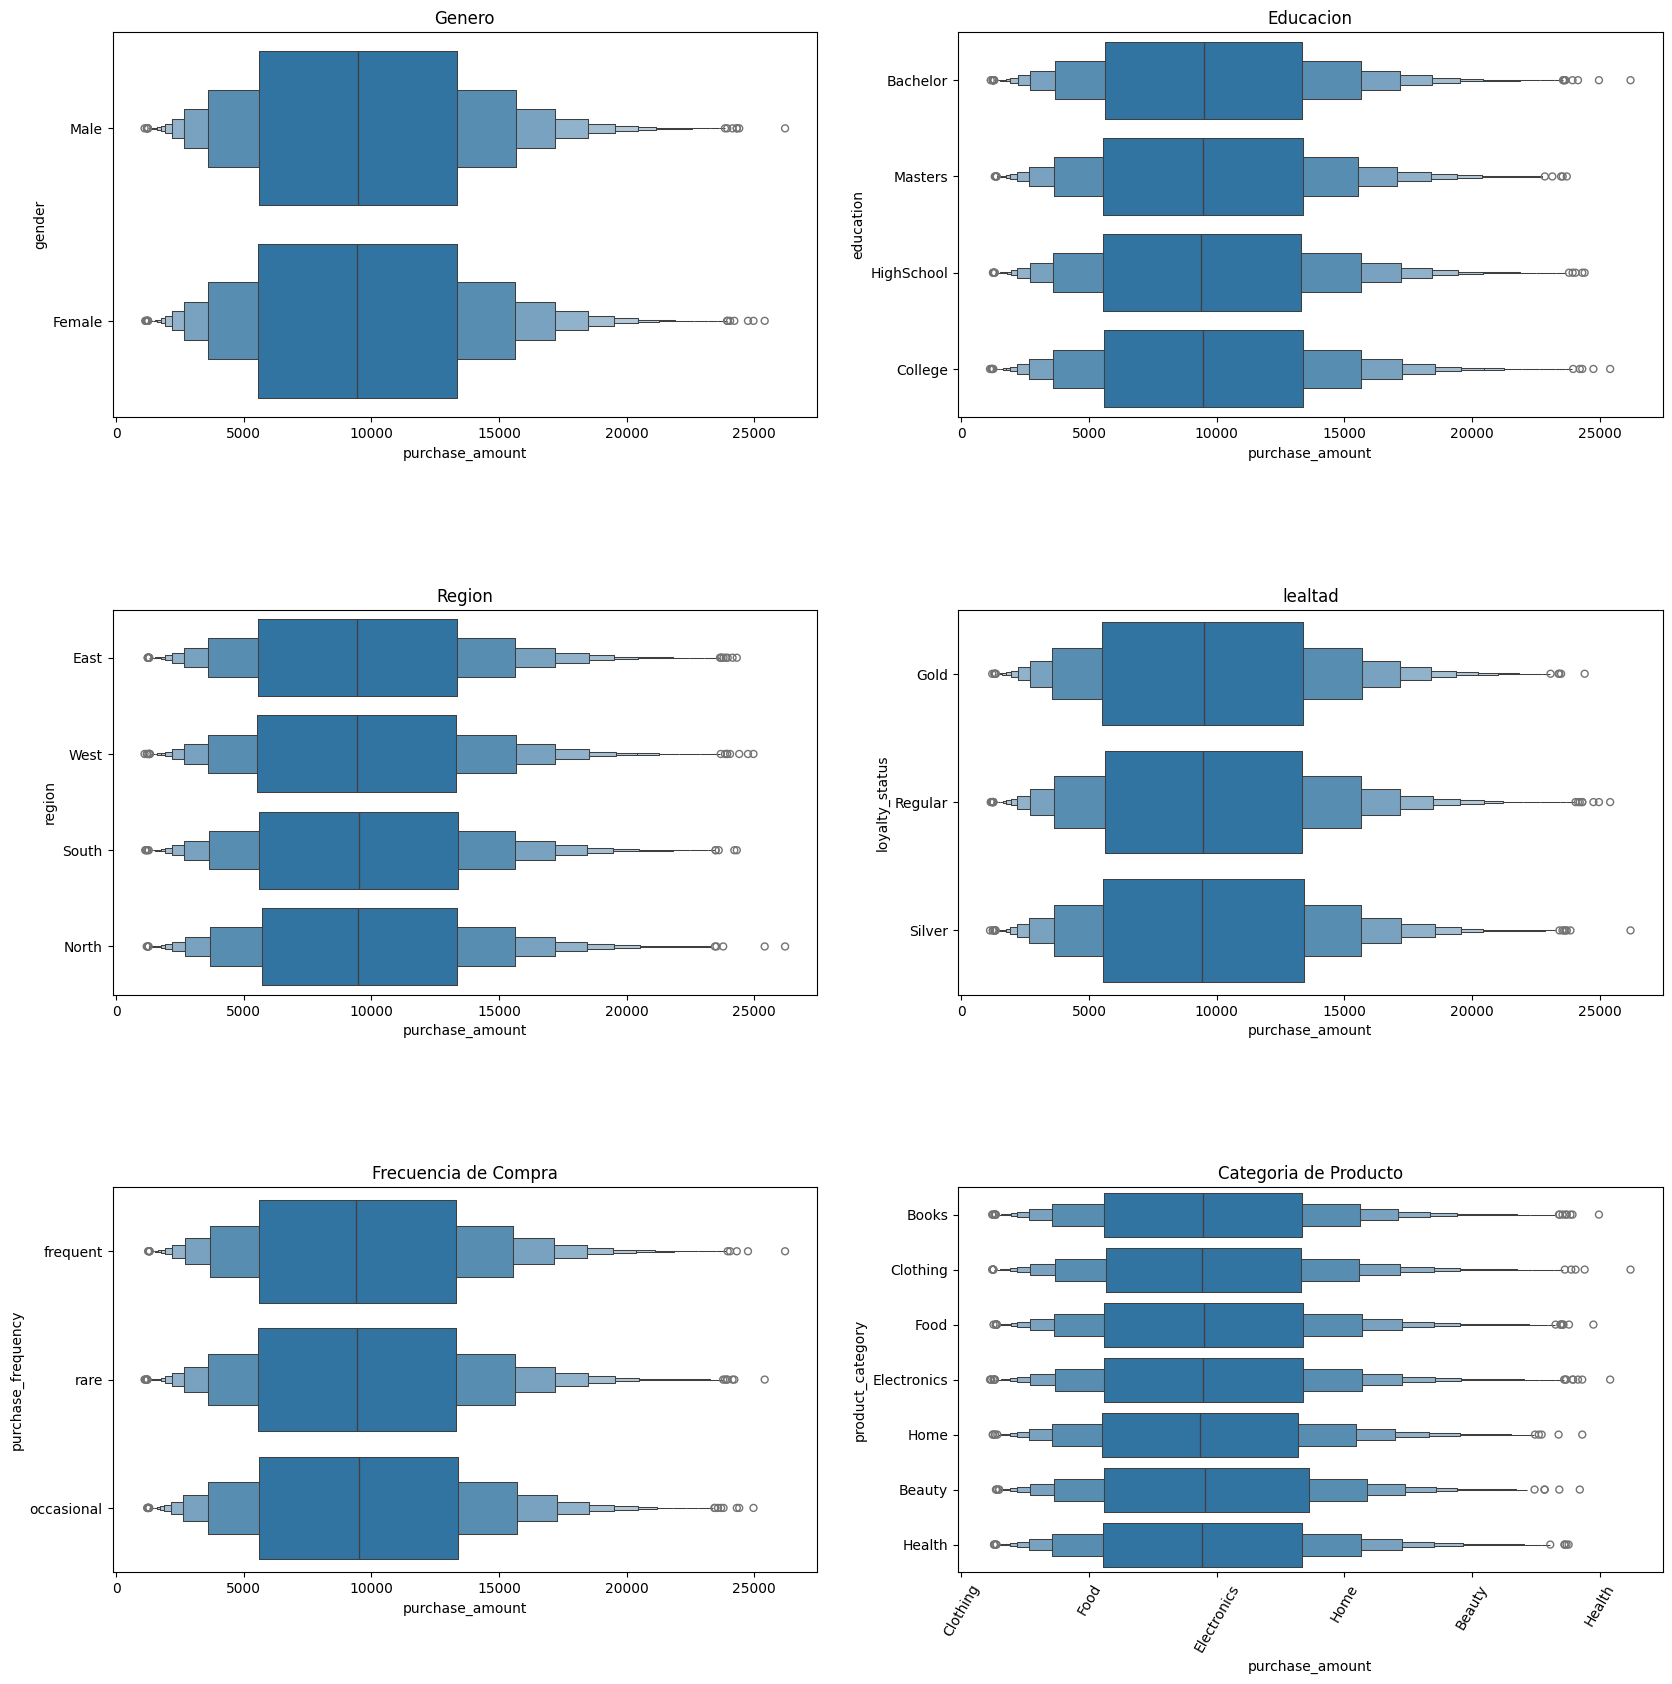

In [50]:
fig,axs =plt.subplots(3,2,figsize=(20,20))
sns.boxenplot(data=df, y = "gender", x="purchase_amount" , ax=axs[0,0])
axs[0, 0].set_title("Genero")    

sns.boxenplot(data=df, y = "education" , x="purchase_amount", ax=axs[0,1])
axs[0, 1].set_title("Educacion")  

sns.boxenplot(data=df, y = "region" , x="purchase_amount" , ax=axs[1,0])
axs[1, 0].set_title("Region")  

sns.boxenplot(data=df, y = "loyalty_status" , x="purchase_amount" , ax=axs[1,1])
axs[1, 1].set_title("lealtad")  

sns.boxenplot(data=df, y = "purchase_frequency" , x="purchase_amount" , ax=axs[2,0])
axs[2, 0].set_title("Frecuencia de Compra")  

sns.boxenplot(data=df, y = "product_category" , x="purchase_amount" , ax=axs[2,1])
axs[2, 1].set_title("Categoria de Producto")  

# Ajusto categorias del eje x
axs[2, 1].set_xticklabels(df["product_category"].unique(), rotation=60)

# Ajusta el espacio vertical entre las filas
plt.subplots_adjust(hspace=0.5)  # Puedes ajustar este valor según tus preferencias

# Muestra la figura
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20536\4137366946.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2, 1].set_xticklabels(df["product_category"].unique(), rotation=60)


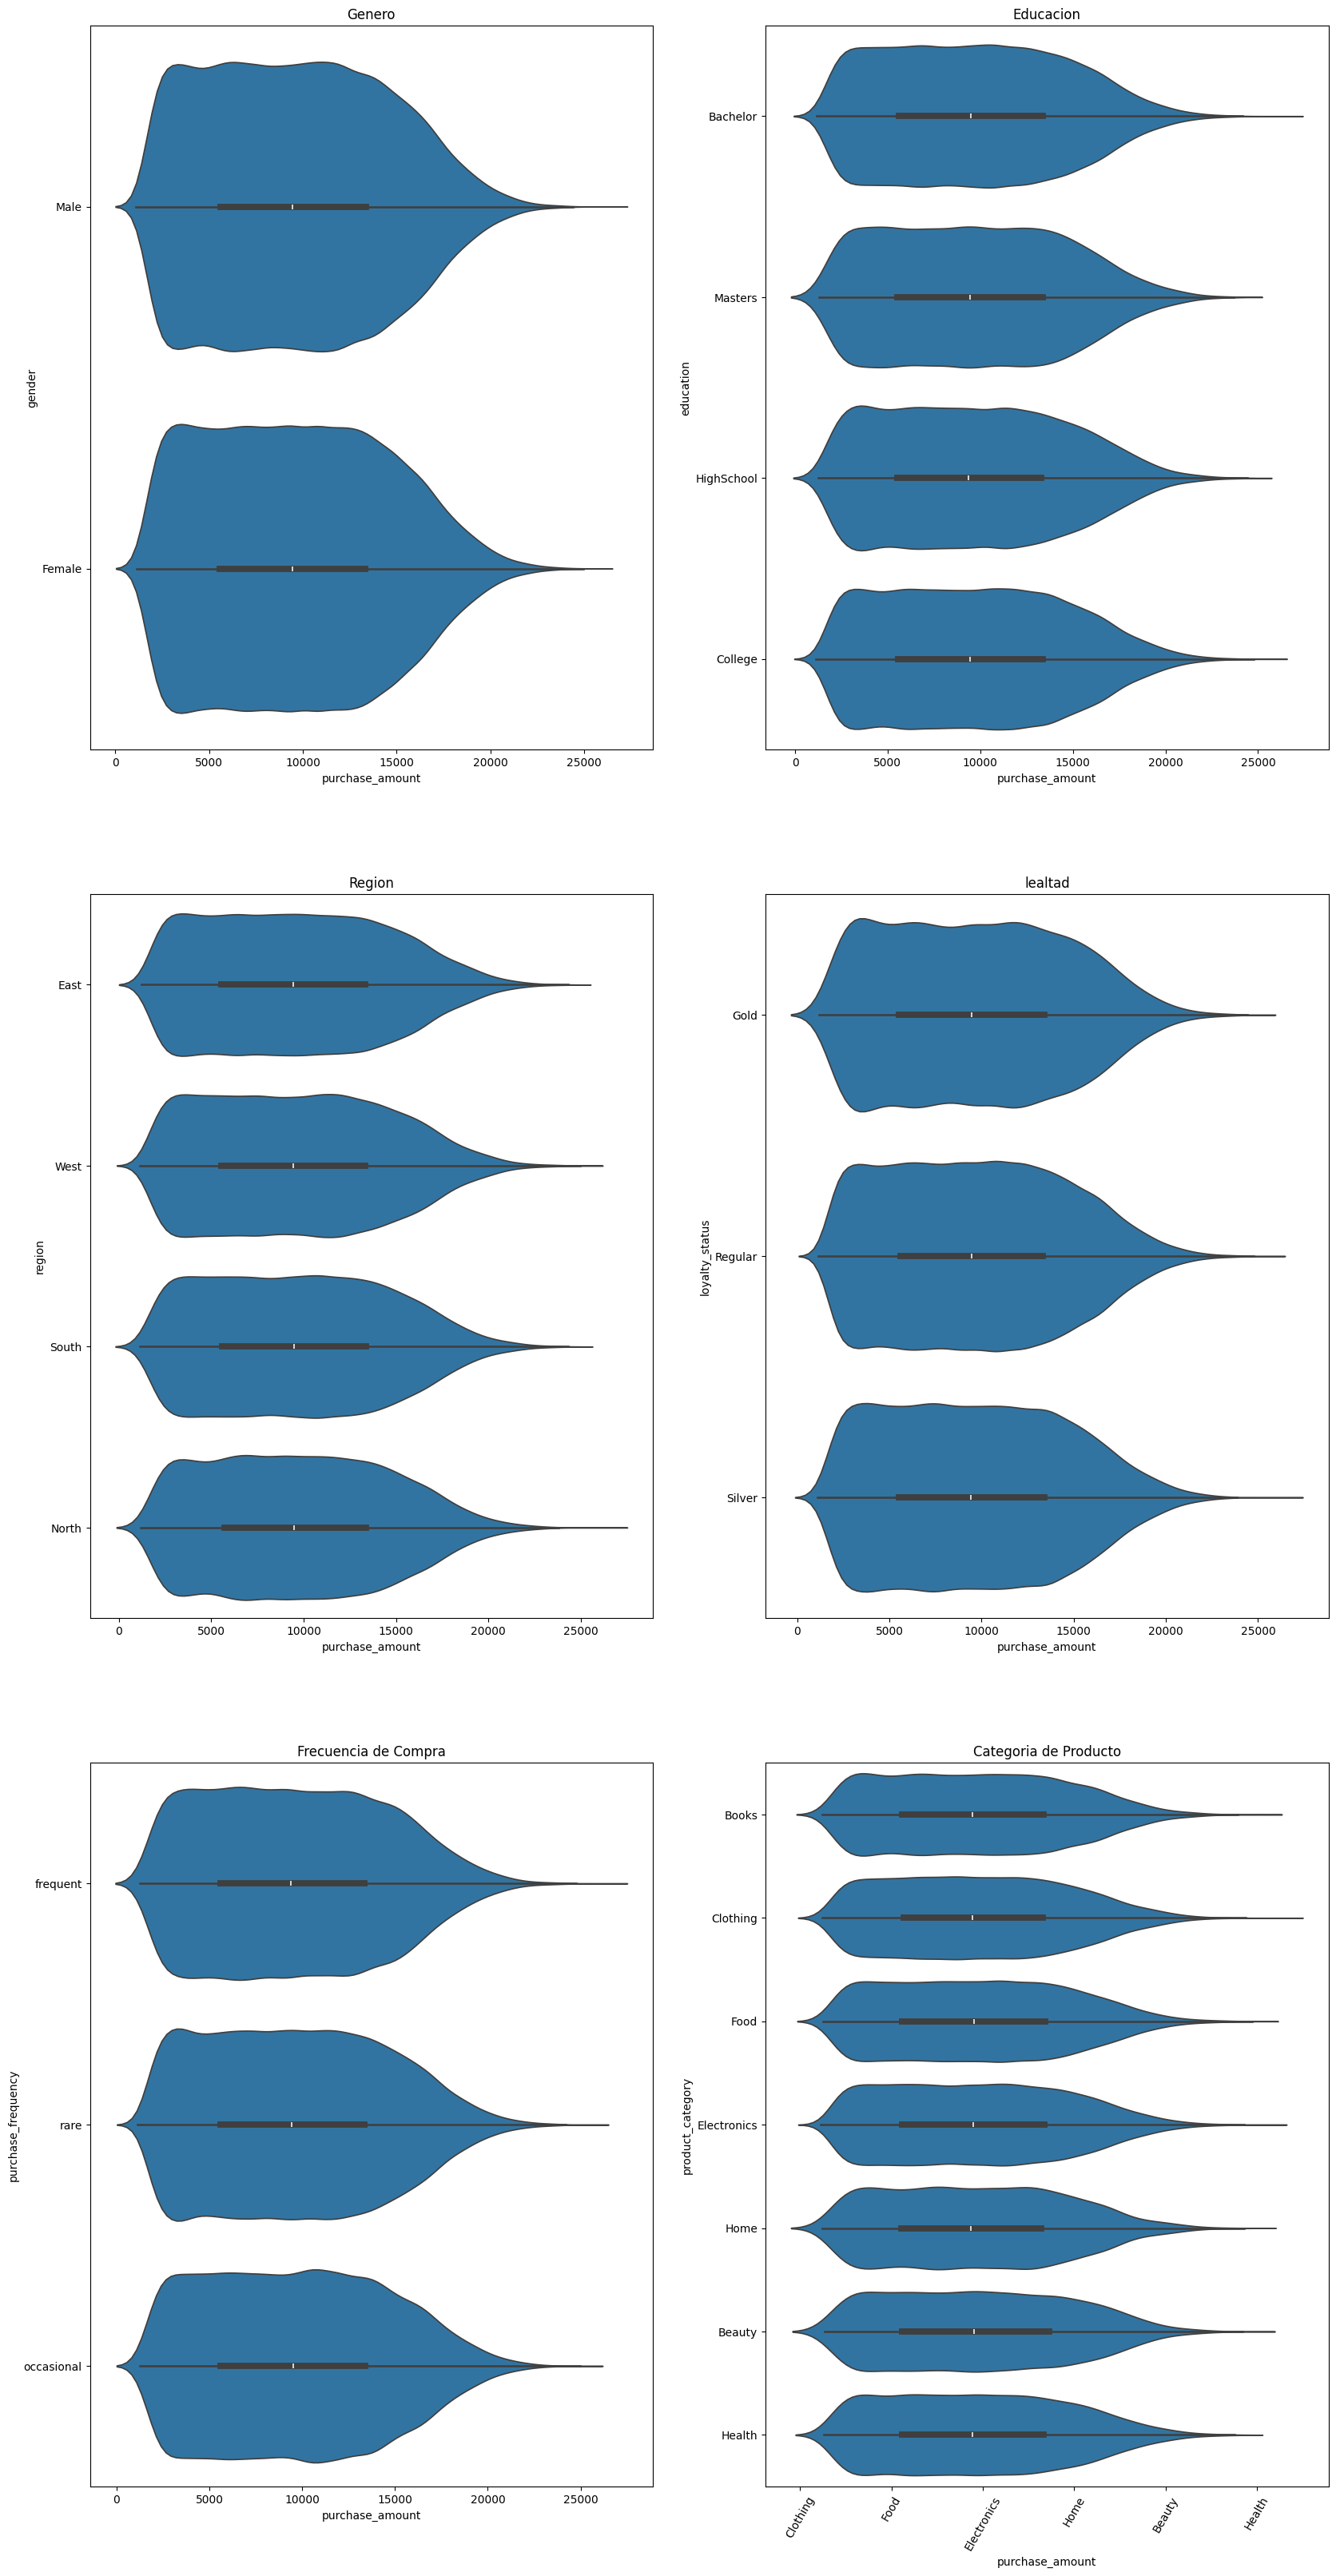

In [51]:
fig,axs =plt.subplots(3,2,figsize=(20,40))
sns.violinplot(data=df, y = "gender", x="purchase_amount" , ax=axs[0,0])
axs[0, 0].set_title("Genero")    

sns.violinplot(data=df, y = "education" , x="purchase_amount", ax=axs[0,1])
axs[0, 1].set_title("Educacion")  

sns.violinplot(data=df, y = "region" , x="purchase_amount" , ax=axs[1,0])
axs[1, 0].set_title("Region")  

sns.violinplot(data=df, y = "loyalty_status" , x="purchase_amount" , ax=axs[1,1])
axs[1, 1].set_title("lealtad")  

sns.violinplot(data=df, y = "purchase_frequency" , x="purchase_amount" , ax=axs[2,0])
axs[2, 0].set_title("Frecuencia de Compra")  

sns.violinplot(data=df, y = "product_category" , x="purchase_amount" , ax=axs[2,1])
axs[2, 1].set_title("Categoria de Producto")  

# Ajusto categorias del eje x
axs[2, 1].set_xticklabels(df["product_category"].unique(), rotation=60)

# Ajusta el espacio vertical entre las filas
#plt.subplots_adjust(hspace=0.5)  # Puedes ajustar este valor según tus preferencias

# Muestra la figura
plt.show()

### Comparisons

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20536\1213156861.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2, 1].set_xticklabels(df["product_category"].unique(), rotation=60)


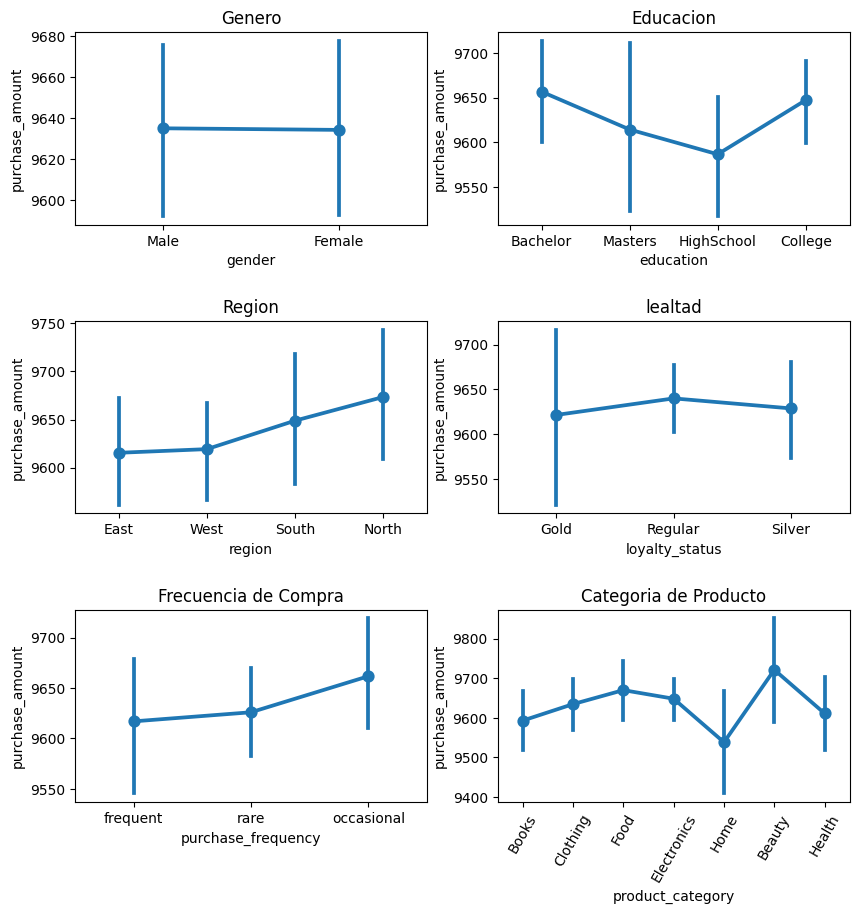

In [52]:
fig,axs =plt.subplots(3,2,figsize=(10,10))
sns.pointplot(data=df, x = "gender", y="purchase_amount", ax=axs[0,0])
axs[0, 0].set_title("Genero")    

sns.pointplot(data=df, x = "education" , y="purchase_amount", ax=axs[0,1])
axs[0, 1].set_title("Educacion")  

sns.pointplot(data=df, x = "region" , y="purchase_amount", ax=axs[1,0])
axs[1, 0].set_title("Region")  

sns.pointplot(data=df, x = "loyalty_status" , y="purchase_amount", ax=axs[1,1])
axs[1, 1].set_title("lealtad")  

sns.pointplot(data=df, x = "purchase_frequency" , y="purchase_amount", ax=axs[2,0])
axs[2, 0].set_title("Frecuencia de Compra")  

sns.pointplot(data=df, x = "product_category" , y="purchase_amount", ax=axs[2,1])
axs[2, 1].set_title("Categoria de Producto")  

# Ajusto categorias del eje x
axs[2, 1].set_xticklabels(df["product_category"].unique(), rotation=60)

# Ajusta el espacio vertical entre las filas
plt.subplots_adjust(hspace=0.5)  # Puedes ajustar este valor según tus preferencias

# Muestra la figura
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20536\2346066819.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2, 1].set_xticklabels(df["product_category"].unique(), rotation=60)


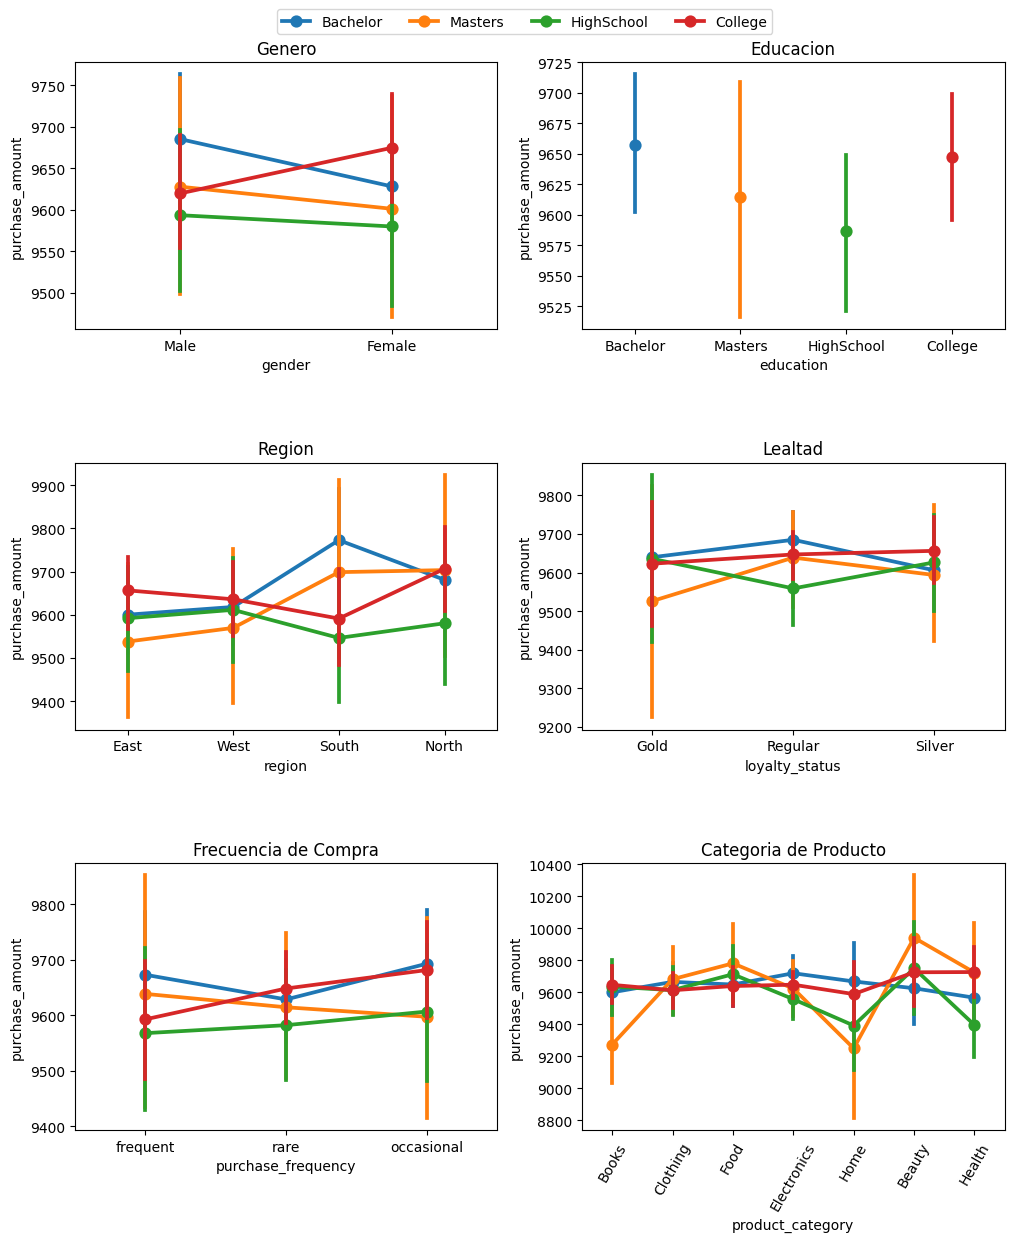

In [53]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))  # Adjusted figsize for better spacing

# Create the plots with the legend only on one plot to get the handles and labels
sns.pointplot(data=df, x="gender", y="purchase_amount", hue="education", ax=axs[0, 0])
axs[0, 0].set_title("Genero")

sns.pointplot(data=df, x="education", y="purchase_amount", hue="education", ax=axs[0, 1], legend=False)
axs[0, 1].set_title("Educacion")

sns.pointplot(data=df, x="region", y="purchase_amount", hue="education", ax=axs[1, 0], legend=False)
axs[1, 0].set_title("Region")

sns.pointplot(data=df, x="loyalty_status", y="purchase_amount", hue="education", ax=axs[1, 1], legend=False)
axs[1, 1].set_title("Lealtad")

sns.pointplot(data=df, x="purchase_frequency", y="purchase_amount", hue="education", ax=axs[2, 0], legend=False)
axs[2, 0].set_title("Frecuencia de Compra")

sns.pointplot(data=df, x="product_category", y="purchase_amount", hue="education", ax=axs[2, 1], legend=False)
axs[2, 1].set_title("Categoria de Producto")
axs[2, 1].set_xticklabels(df["product_category"].unique(), rotation=60)

# Extract handles and labels from the first plot (which has the legend)
handles, labels = axs[0, 0].get_legend_handles_labels()

# Remove the legend from the first plot (to avoid duplication)
axs[0, 0].legend_.remove()

# Create a single legend outside the plot area using the handles and labels from the first plot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(labels))

# Adjust the layout to make room for the legend
plt.subplots_adjust(hspace=0.5, top=1.0)  # Adjust 'top' to make room for the legend

# Show the figure
plt.show()


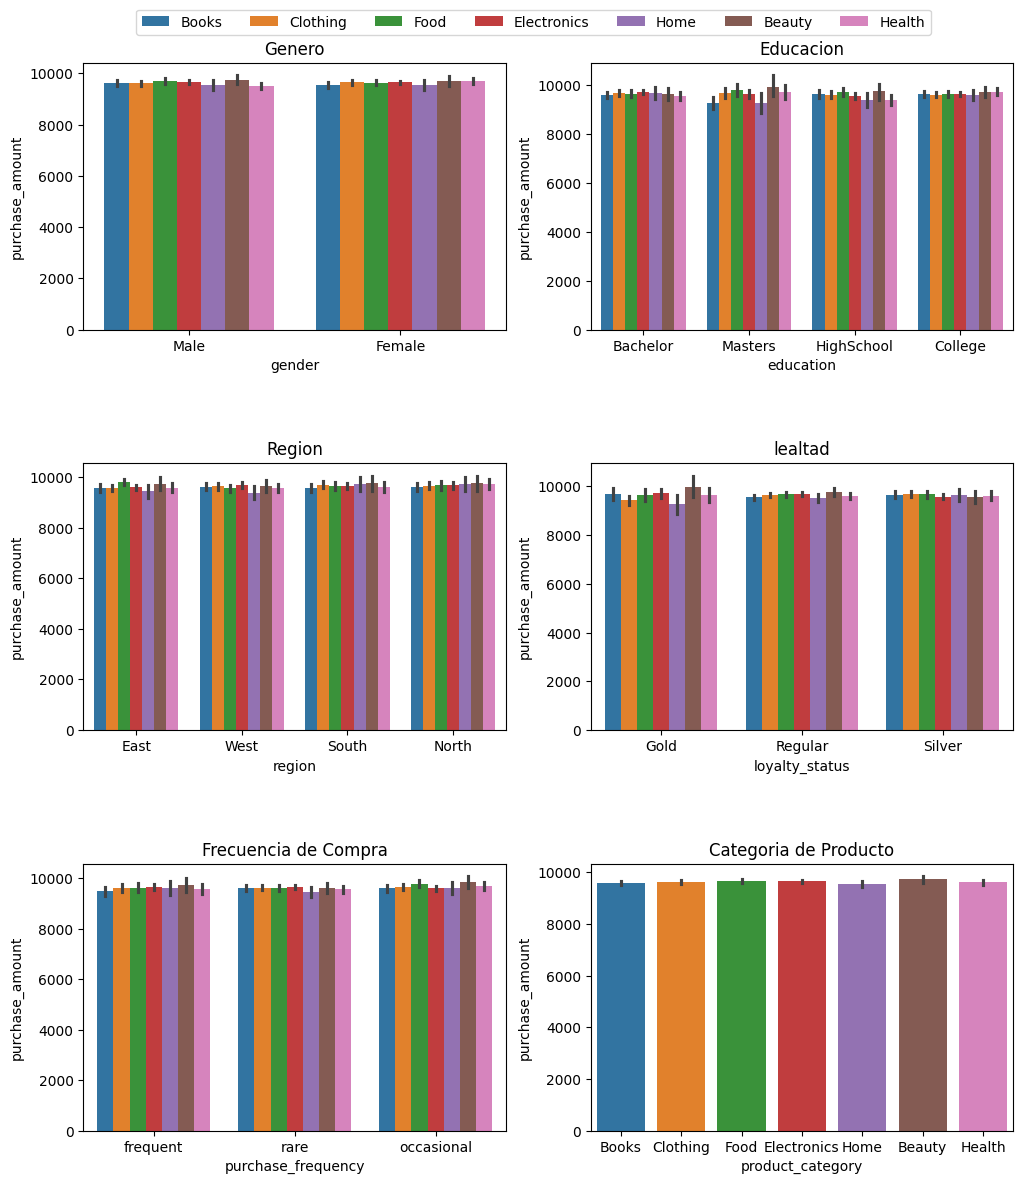

In [54]:
fig,axs =plt.subplots(3,2,figsize=(12,12))
sns.barplot(data=df, x = "gender", y="purchase_amount" ,hue="product_category", ax=axs[0,0])
axs[0, 0].set_title("Genero")    

sns.barplot(data=df, x = "education" , y="purchase_amount" ,hue="product_category", ax=axs[0,1], legend= False)
axs[0, 1].set_title("Educacion")  

sns.barplot(data=df, x = "region" , y="purchase_amount" ,hue="product_category", ax=axs[1,0], legend= False)
axs[1, 0].set_title("Region")  

sns.barplot(data=df, x = "loyalty_status" , y="purchase_amount" ,hue="product_category", ax=axs[1,1], legend= False)
axs[1, 1].set_title("lealtad")  

sns.barplot(data=df, x = "purchase_frequency" , y="purchase_amount" ,hue="product_category", ax=axs[2,0], legend= False)
axs[2, 0].set_title("Frecuencia de Compra")  

sns.barplot(data=df, x = "product_category" , y="purchase_amount",hue="product_category", ax=axs[2,1], legend= False)
axs[2, 1].set_title("Categoria de Producto")  

# Extract handles and labels from the first plot (which has the legend)
handles, labels = axs[0, 0].get_legend_handles_labels()

# Remove the legend from the first plot (to avoid duplication)
axs[0, 0].legend_.remove()

# Create a single legend outside the plot area using the handles and labels from the first plot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(labels))

# Adjust the layout to make room for the legend
plt.subplots_adjust(hspace=0.5, top=1.0)  # Adjust 'top' to make room for the legend

# Show the figure
plt.show()

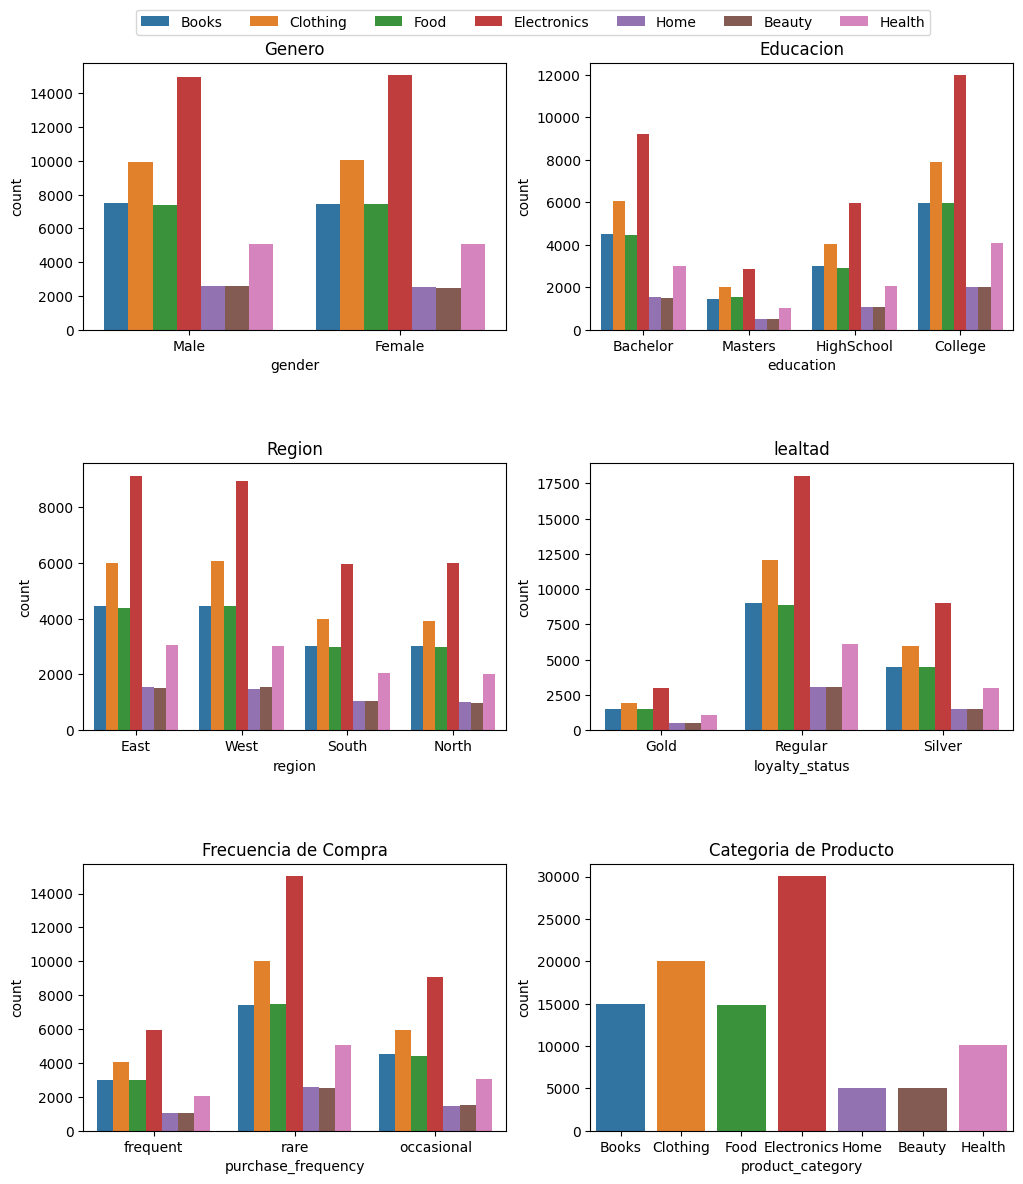

In [55]:
fig,axs =plt.subplots(3,2,figsize=(12,12))
sns.countplot(data=df, x = "gender" ,hue="product_category", ax=axs[0,0])
axs[0, 0].set_title("Genero")    

sns.countplot(data=df, x = "education"  ,hue="product_category", ax=axs[0,1], legend= False)
axs[0, 1].set_title("Educacion")  

sns.countplot(data=df, x = "region"  ,hue="product_category", ax=axs[1,0], legend= False)
axs[1, 0].set_title("Region")  

sns.countplot(data=df, x = "loyalty_status"  ,hue="product_category", ax=axs[1,1], legend= False)
axs[1, 1].set_title("lealtad")  

sns.countplot(data=df, x = "purchase_frequency"  ,hue="product_category", ax=axs[2,0], legend= False)
axs[2, 0].set_title("Frecuencia de Compra")  

sns.countplot(data=df, x = "product_category" ,hue="product_category", ax=axs[2,1], legend= False)
axs[2, 1].set_title("Categoria de Producto")  

# Extract handles and labels from the first plot (which has the legend)
handles, labels = axs[0, 0].get_legend_handles_labels()

# Remove the legend from the first plot (to avoid duplication)
axs[0, 0].legend_.remove()

# Create a single legend outside the plot area using the handles and labels from the first plot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(labels))

# Adjust the layout to make room for the legend
plt.subplots_adjust(hspace=0.5, top=1.0)  # Adjust 'top' to make room for the legend

# Show the figure
plt.show()

## Composition

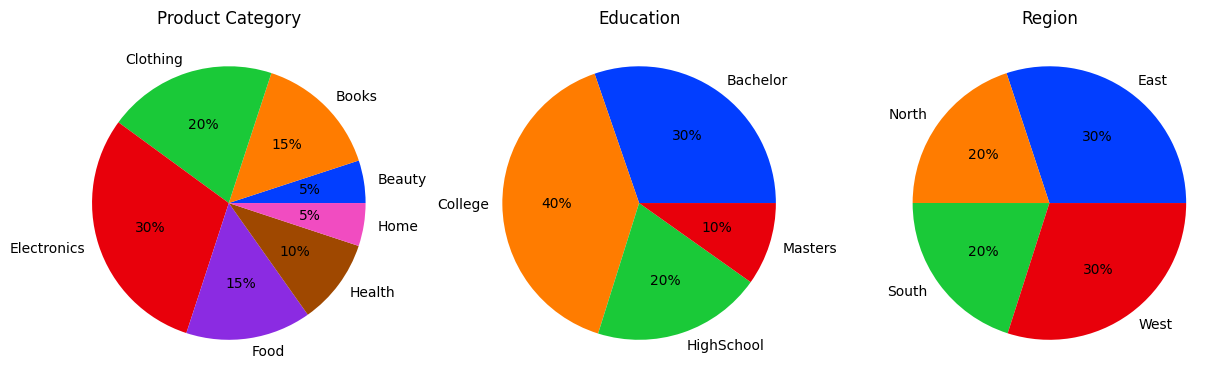

In [56]:
#pie PLot
fig,axs =plt.subplots(1,3,figsize=(15,15))
data = df.groupby("product_category")["purchase_amount"].count()
axs[0].pie(data,labels=data.index, colors=sns.color_palette('bright'),autopct='%.0f%%')
axs[0].set_title("Product Category")

data2 = df.groupby("education")["purchase_amount"].count()
axs[1].pie(data2,labels=data2.index, colors=sns.color_palette('bright'),autopct='%.0f%%')
axs[1].set_title("Education")

data3 = df.groupby("region")["purchase_amount"].count()
axs[2].pie(data3,labels=data3.index, colors=sns.color_palette('bright'),autopct='%.0f%%')
axs[2].set_title("Region")

plt.show()

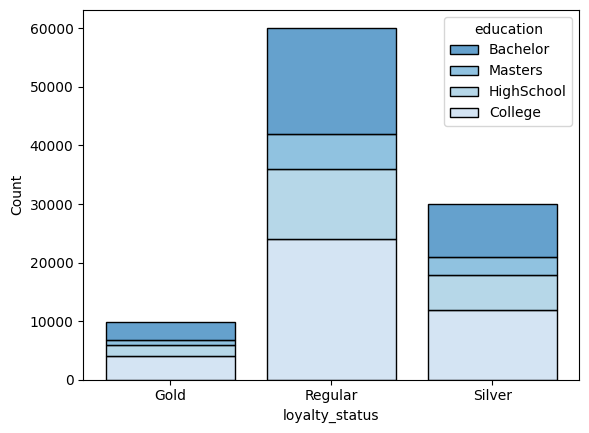

In [57]:
#Stacked Bar Chart
# One liner to create a stacked bar chart.
ax = sns.histplot(df, x='loyalty_status', hue='education',
             multiple='stack', palette='tab20c', shrink=0.8)

# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

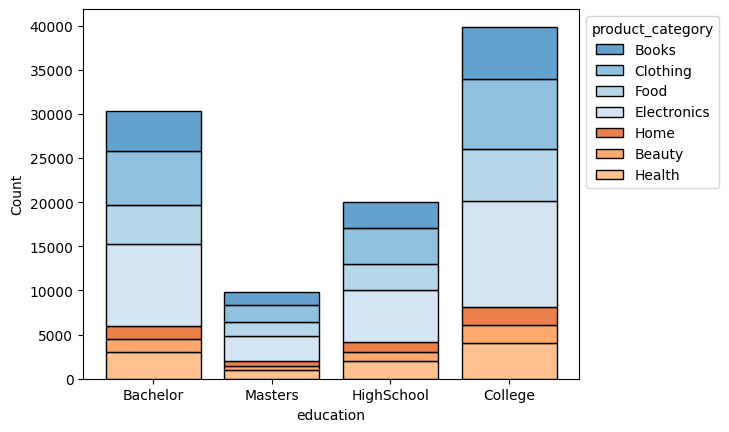

In [58]:
#Stacked Bar Chart
# One liner to create a stacked bar chart.
ax = sns.histplot(df, x='education', hue="product_category",
             multiple='stack', palette='tab20c', shrink=0.8)

# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

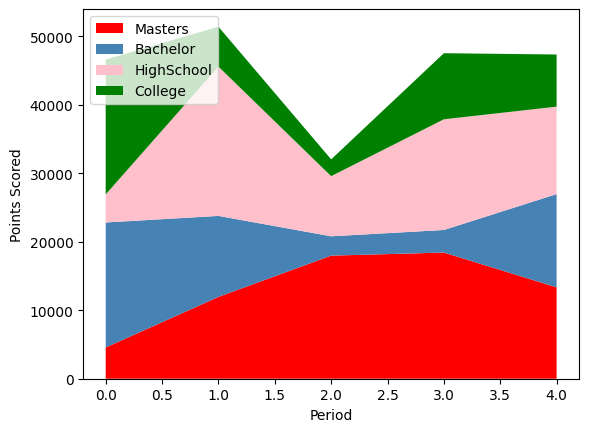

In [59]:
Masters = df[df["education"] == 'Masters'] ['purchase_amount'].head()
Bachelor = df[df["education"] == 'Bachelor'] ['purchase_amount'].head()
HighSchool = df[df["education"] == 'HighSchool'] ['purchase_amount'].head()
College = df[df["education"] == 'College'] ['purchase_amount'].head()
x = pd.Series(range(len(College)))

color_map = ['red', 'steelblue', 'pink','green']

plt.stackplot(x,Masters, Bachelor, HighSchool, College,
              labels=["Masters","Bachelor","HighSchool","College"],colors=color_map)

#add legend
plt.legend(loc='upper left')

#add axis labels
plt.xlabel('Period')
plt.ylabel('Points Scored')

#display area chart
plt.show()

## Correlation Analysis

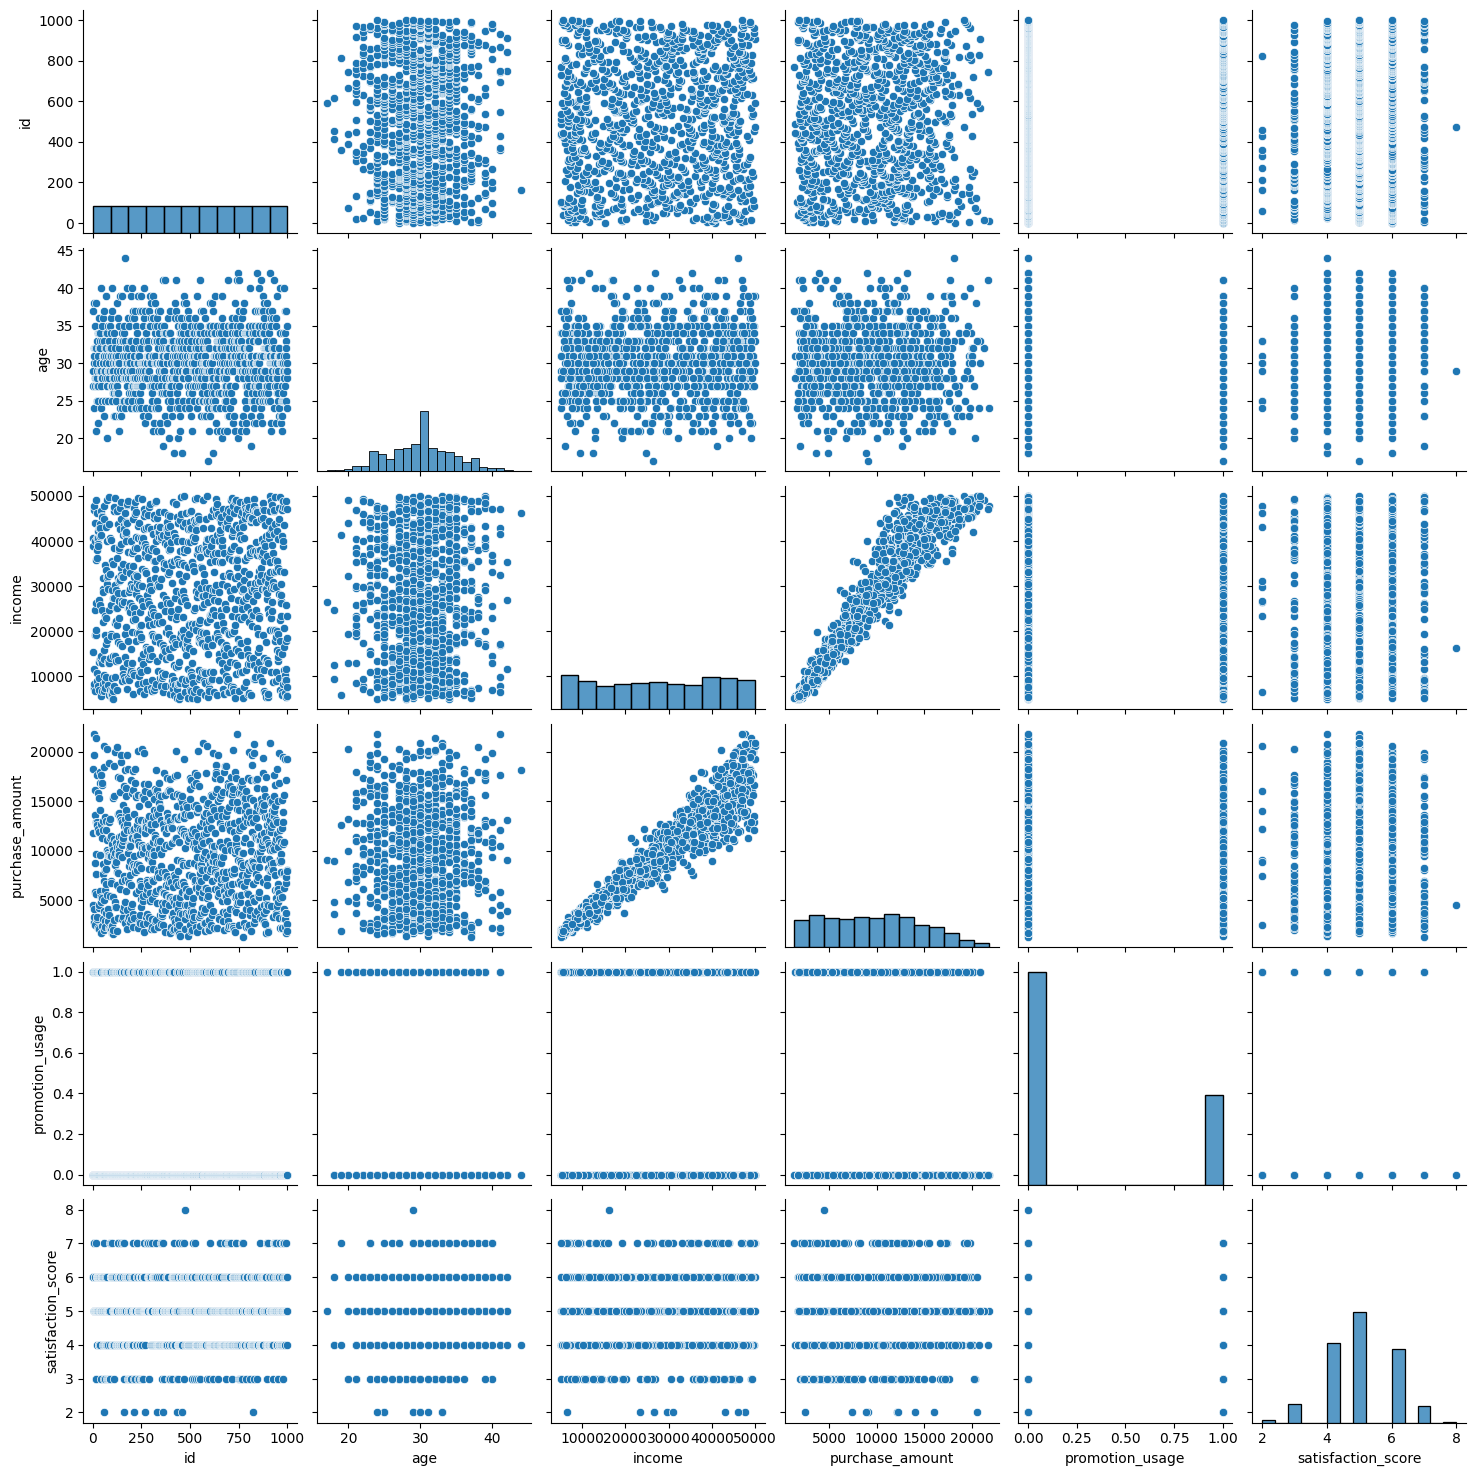

In [60]:
sns.pairplot(data=df.head(1000))

## Conclusiones del EDA 

Se Observa que los datos estan compuestos mayormente por clientes regulares que van al collage y compran mayormente productos electronicos.

Ademas la distribucion se las caracteristicas se observa que en las variables numericas (edad, cantidad gastada y sueldo) vemos una distribucion normal para edades, distribucion con cola derecha para cantidad gastada y no se distingue una distribucion especifica para los sueldos (casi constante).

En cuanto a variables categoricas en casi todas ellas se cuentan con distribuciones de cola derecha 

Para las **Relaciones** solo vemos una realcion, la cual es directa, entre salario y candida gastada.

# Feature Selection

## Synthetic Feature Creation

In [64]:
# Define bins and labels
bins = [0, 12, 19, 35, 60, np.inf]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

In [65]:
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [66]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,age_category
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,Young Adult
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6,Young Adult
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6,Adult
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7,Young Adult
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5,Young Adult


In [67]:
# Define bins and labels
bins = [0, 10000, 20000, 30000, 50000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

In [68]:
# Create a new categorical feature
df['purchase_category'] = pd.cut(df['purchase_amount'], bins=bins, labels=labels, right=False)

In [69]:
# Combine features into a new composite feature
df['composite_feature'] = df['product_category'] + '_' + df['purchase_category'].astype(str) + '_' + df['purchase_frequency']

In [70]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,age_category,purchase_category,composite_feature
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6,Young Adult,Low,Books_Low_frequent
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6,Young Adult,Very Low,Clothing_Very Low_rare
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6,Adult,Low,Clothing_Low_rare
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7,Young Adult,Very Low,Food_Very Low_frequent
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5,Young Adult,Low,Clothing_Low_occasional


## Initial Prunning

"income": its unnecesarry because its linearly correlated with purchased amount.

"id": its unnecesary because it does not add significant amount of data, its just an identifier.

"region": it would be eliminated because in this scenario i want the model to not consider the rigion of the customer so it able to function "world wide".

In [71]:
df.drop(columns=["income","id","region"],inplace=True)

## Filter Method

### Correlation Matrix

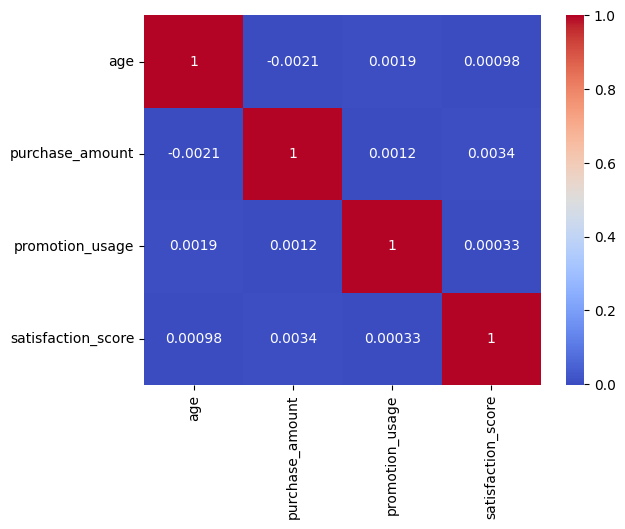

In [72]:
numeric = df.select_dtypes(include=['number'])
corr_matrix = numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Chi-Square test

In [73]:
from scipy.stats import chi2_contingency
import itertools

In [74]:
def chi2_all_combinations(df):
    # Get all categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category', 'int64', 'int32']).columns
    # Iterate over all combinations of categorical columns
    for column1, column2 in itertools.combinations(categorical_columns, 2):
        # Step 1: Create a contingency table (cross-tabulation)
        contingency_table = pd.crosstab(df[column1], df[column2])
        
        # Step 2: Apply the Chi-Square test
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        
        # Print the results
        print(f"Between {column1} and {column2} the Chi-Square test results:")
        print("Chi-Square Statistic:", chi2_stat)
        print("P-Value:", p_val)
        print("Degrees of Freedom:", dof)
        print("Expected Frequencies:\n", expected)
        print("")

In [75]:
categorical_df = df[["gender","education","loyalty_status","purchase_frequency","product_category","promotion_usage","satisfaction_score","age_category","purchase_category","composite_feature"]]

In [76]:
chi2_all_combinations(categorical_df)

Between gender and education the Chi-Square test results:
Chi-Square Statistic: 2.046595548373187
P-Value: 0.5627921629539192
Degrees of Freedom: 3
Expected Frequencies:
 [[15161.90646 19966.50676 10030.32294  4915.26384]
 [15117.09354 19907.49324 10000.67706  4900.73616]]

Between gender and loyalty_status the Chi-Square test results:
Chi-Square Statistic: 3.7564600876982195
P-Value: 0.15286042270713818
Degrees of Freedom: 2
Expected Frequencies:
 [[ 4956.32452 30113.50212 15004.17336]
 [ 4941.67548 30024.49788 14959.82664]]

Between gender and purchase_frequency the Chi-Square test results:
Chi-Square Statistic: 0.229569826087963
P-Value: 0.8915578857572685
Degrees of Freedom: 2
Expected Frequencies:
 [[10062.3703  14965.11564 25046.51406]
 [10032.6297  14920.88436 24972.48594]]

Between gender and product_category the Chi-Square test results:
Chi-Square Statistic: 4.6283470934659885
P-Value: 0.5922837385590232
Degrees of Freedom: 6
Expected Frequencies:
 [[ 2521.2259   7473.5445  10

relation between:
educaiton and age_category.
purchase_frequency  and composite_feature.
product_category and composite_feature.
purchase_category  and composite_feature.

In [77]:
df.drop(columns=["education","purchase_frequency","product_category","purchase_category"],inplace=True)

## Chi-Square Statistic, Degrees of Freedom, and P-Value Interpretatio

Between  education and  purchase_frequency  i saw the following numbers:
n

1. **Chi-Square Statistic (12.5)**:
   - A Chi-Square statistic of 12.5 suggests there is some deviation between the observed and expected frequencies, indicating a potential relationship between the variables.

2. **Degrees of Freedom (6)**:
   - With 6 degrees of freedom, this statistic reflects a moderate level of complexity in your contingency table. The fewer the degrees of freedom, the smaller the expected variation in the Chi-Square statistic.

3. **P-Value (0.058)**:
   - A p-value of 0.058 is very close to the common significance threshold of 0.05. This means there is a 5.8% probability that you would observe a Chi-Square statistic as extreme as (or more extreme than) 12.5 if the null hypothesis (that the variables are independent) is true.

### Conclusion Based on This Example

- **Chi-Square Statistic (12.5)**:
  - This statistic indicates some evidence of a relationship between the variables. The magnitude is moderate, suggesting that the association, if it exists, might not be very strong but is worth considering.

- **P-Value (0.058)**:
  - The p-value is slightly above the 0.05 threshold. This suggests that while the evidence against the null hypothesis is relatively strong, it is not strong enough to reject the null hypothesis at the 5% significance level.

### Final Interpretation

- **Conclusion**: In this case, you would **fail to reject the null hypothesis** at the 0.05 significance level, but the result is borderline. The p-value being close to 0.05 suggests there might be some association between the variables, but the evidence is not quite strong enough to be conclusive.
  
- **Implication for Feature Selection**: Given that the p-value is very close to the significance level, this could be considered a borderline case. Depending on the context and the importance of the features, you might:
  - Keep the features and consider further analysis or use a slightly higher threshold (e.g., 0.1) to make a decision.
  - Or, if you're strictly adhering to the 0.05 threshold, you would consider these variables independent and potentially redundant, leading to the possible removal of one of them

### In Summary

- **Chi-Square Statistic (12.5)**: Suggests moderate evidence of a potential relationship between the variables.
- **P-Value (0.058)**: Very close to 0.05, suggesting a borderline decision.
- **Decision**: Fail to reject the null hypothesis at the 0.05 level, but consider this a borderline case where the variables might r clarification.

## Additional validation

For this case im using the cramer's V measure of association, Theil's U, and mutual information

In [78]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

In [79]:
# Example usage
confusion_matrix = pd.crosstab(df['education'], df['purchase_frequency'])
v = cramers_v(confusion_matrix)
print(f"Cramér's V: {v}") 

KeyError: 'education'

In [66]:
from scipy.stats import entropy

In [67]:
def theils_u(x, y):
    # Create contingency table
    s_xy = pd.crosstab(x, y).values
    
    # Joint probability distribution
    p_xy = s_xy / s_xy.sum()
    
    # Marginal probability distributions
    p_x = p_xy.sum(axis=1)
    p_y = p_xy.sum(axis=0)
    
    # Calculate entropies
    h_x = entropy(p_x)
    h_y = entropy(p_y)
    h_xy = entropy(p_xy.flatten())
    
    # Theil's U calculation
    return (h_x + h_y - h_xy) / h_x

In [68]:
u = theils_u(df['education'], df['purchase_frequency'])
print(f"Theil's U: {u}")

Theil's U: 4.745424637366036e-05


In [69]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

In [70]:
def mutual_information(df, column1, column2):
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(df[[column1]]).toarray()
    mi = mutual_info_classif(X_encoded, df[column2], discrete_features=True)
    return mi[0]

In [71]:
mi = mutual_information(df, 'education', 'purchase_frequency')
print(f"Mutual Information: {mi}")

Mutual Information: 8.102194415132713e-06


In [72]:
mi = mutual_information(df, 'purchase_frequency', 'education')
print(f"Mutual Information: {mi}")

Mutual Information: 4.414035613035938e-05


i can actually state that there is no assosiation between the two

# Clustering

In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(data=df, columns=["gender","loyalty_status","age_category","composite_feature"])

In [84]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

# Convert the scaled features back to a DataFrame for ease of use
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)

## Determine Number of Clusters

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

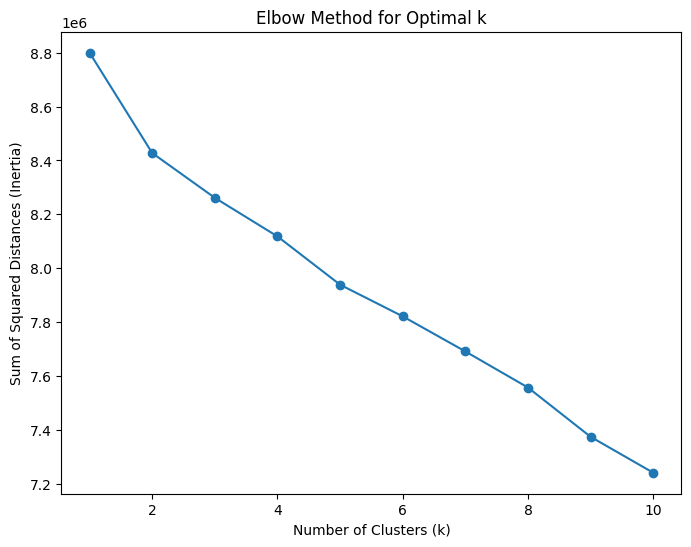

In [41]:
# Determine the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()


C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

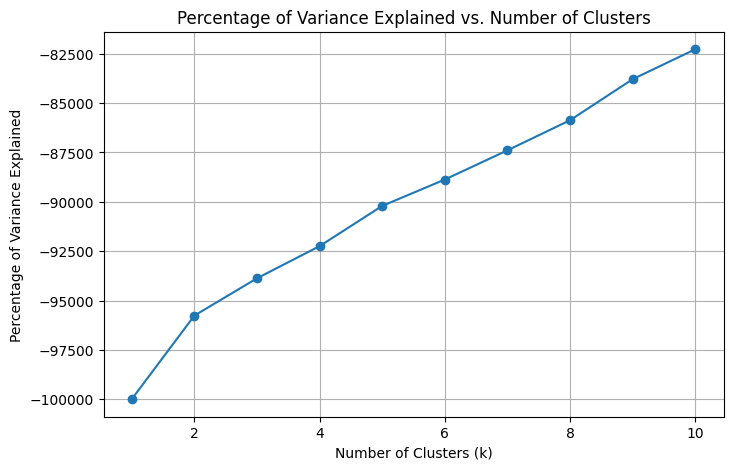

In [42]:
# Determine the optimal number of clusters using the Percentage of Variance
# Range of k values to try
k_range = range(1, 11)

# Total variance in the dataset
total_variance = np.var(df_scaled, axis=0).sum()

# List to store percentage of variance explained
explained_variance_ratios = []

# Calculate the percentage of variance explained for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    # Inertia is the sum of squared distances of samples to their closest cluster center
    explained_variance = total_variance - kmeans.inertia_
    explained_variance_ratio = explained_variance / total_variance
    explained_variance_ratios.append(explained_variance_ratio)

# Plotting the percentage of variance explained
plt.figure(figsize=(8, 5))
plt.plot(k_range, explained_variance_ratios, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Percentage of Variance Explained')
plt.title('Percentage of Variance Explained vs. Number of Clusters')
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
# Determine the optimal number of clusters using the Silhouette Method

# Range of k values to try
k_range = range(2, 11)  # Starting from 2 since silhouette score is not defined for 1 cluster

# List to store silhouette scores
silhouette_scores = []

# Calculate silhouette score for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

## Clustering

### Compering amount of clusters 

In [45]:
from sklearn.metrics import silhouette_score

In [58]:
# Initialize lists to store the scores
silhouette_scores = []
inertia_scores = []

# Range of clusters to try
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    
    # Calculate the Silhouette Score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Store Inertia (Within-cluster Sum of Squares)
    inertia = kmeans.inertia_
    inertia_scores.append(inertia)

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

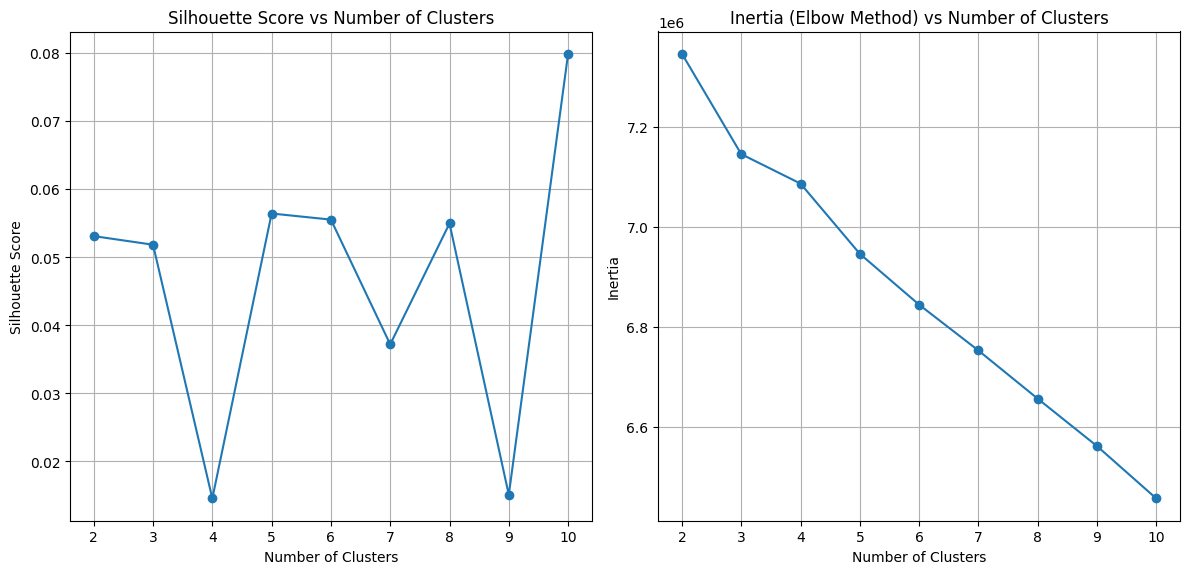

In [59]:
# Plotting Silhouette Score and Inertia for different numbers of clusters
plt.figure(figsize=(12, 6))

# Plotting Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Plotting Inertia (Elbow Method)
plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertia_scores, marker='o', label='Inertia')
plt.title('Inertia (Elbow Method) vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)

plt.tight_layout()
plt.show()

## Predicting Clusters

In [85]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Add the cluster assignments to the original dataframe
df['Cluster'] = df['Cluster'].astype(str)
df["Cluster"].value_counts()

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
3    40189
1    39067
4    14825
0     3167
2     2752
Name: count, dtype: int64

## Ploting Clusters

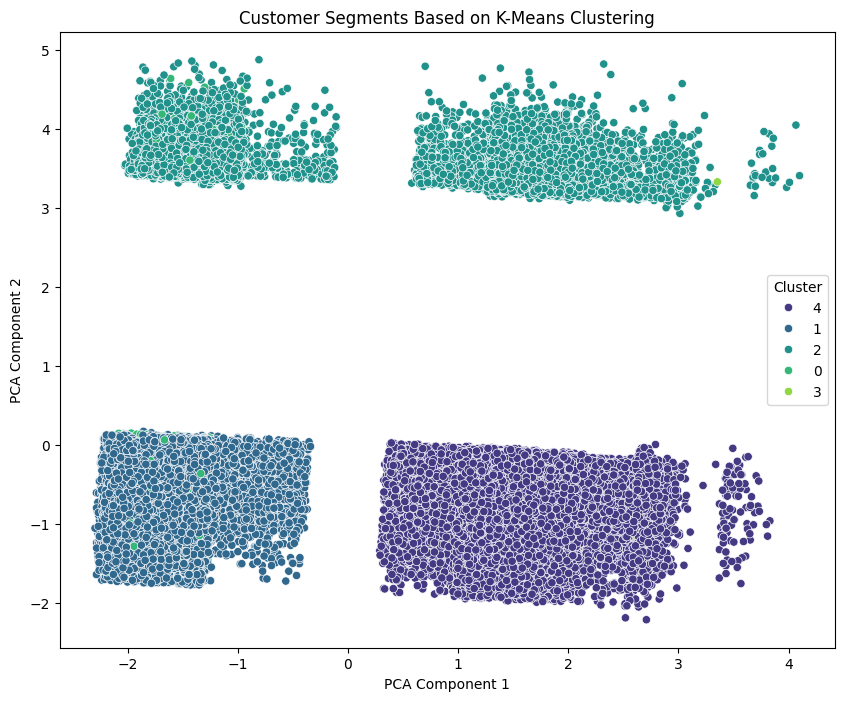

In [64]:
from sklearn.decomposition import PCA

# Reduce to 2D with PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df_scaled)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments Based on K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


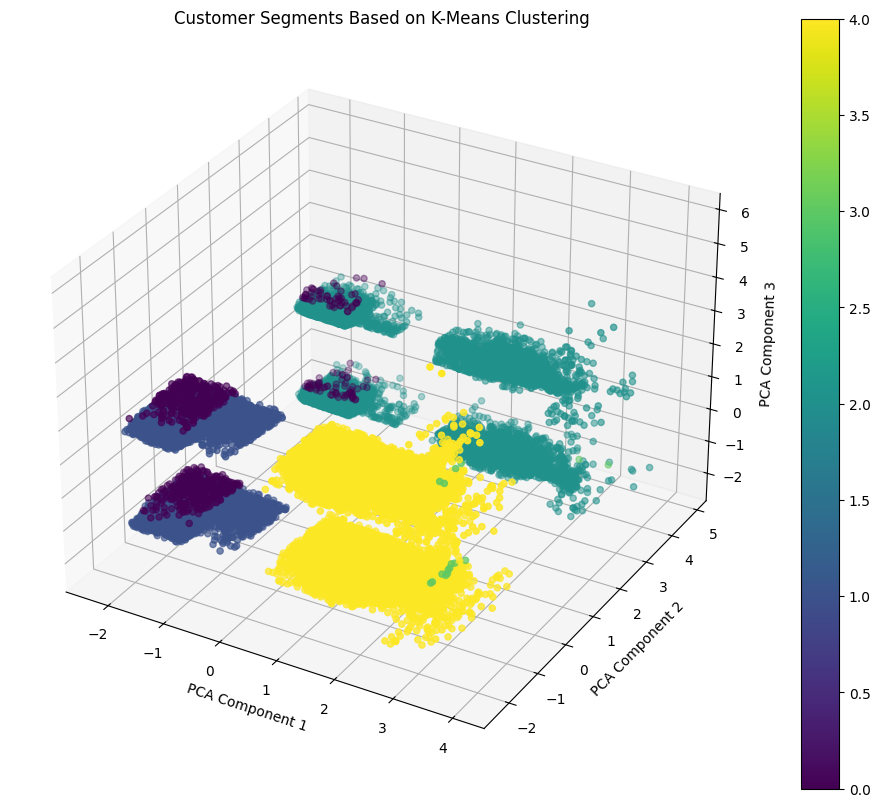

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 3D with PCA
pca = PCA(n_components=9)
reduced_features = pca.fit_transform(df_scaled)

# Ensure cluster labels are integers
df['Cluster'] = df['Cluster'].astype(int)

# Plot the clusters in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Adjust the scatter plot with the corrected cluster labels
sc = ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], 
                c=df['Cluster'], cmap='viridis')

# Add color bar
plt.colorbar(sc)

ax.set_title('Customer Segments Based on K-Means Clustering')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()

In [66]:
df.head()

,age,gender,loyalty_status,purchase_amount,promotion_usage,satisfaction_score,age_category,composite_feature,Cluster
0,27,Male,Gold,18249,0,6,Young Adult,Books_Low_frequent,4
1,29,Male,Regular,4557,1,6,Young Adult,Clothing_Very Low_rare,1
2,37,Male,Silver,11822,0,6,Adult,Clothing_Low_rare,2
3,30,Male,Regular,4098,0,7,Young Adult,Food_Very Low_frequent,1
4,31,Female,Regular,19685,1,5,Young Adult,Clothing_Low_occasional,4


# Labeling Clusters

## Analyzing Clusters Characteristics

In [67]:
cluster_0 = df.loc[df["Cluster"]== 0,:].copy()
cluster_0.name = "Cluster 0"

In [68]:
cluster_1 = df.loc[df["Cluster"]== 1,:].copy()
cluster_1.name = "Cluster 1"

In [69]:
cluster_2 = df.loc[df["Cluster"]== 2,:].copy()
cluster_2.name = "Cluster 2"

In [70]:
cluster_3 = df.loc[df["Cluster"]== 3,:].copy()
cluster_3.name = "Cluster 3"

In [71]:
cluster_4 = df.loc[df["Cluster"]== 4,:].copy()
cluster_4.name = "Cluster 4"

In [81]:
def cluster_numerical_description(df):
    # Calculate means and standard deviations
    age_mean = df["age"].mean()
    age_std = df["age"].std()
    purchase_amount_mean = df["purchase_amount"].mean()
    purchase_amount_std = df["purchase_amount"].std()
    satisfaction_score_mean = df["satisfaction_score"].mean()
    satisfaction_score_std = df["satisfaction_score"].std()
    
    # Create a DataFrame for the numerical summary
    numerical_summary = pd.DataFrame({
        'Metric': ['age', 'purchase_amount', 'satisfaction_score'],
        'Mean': [age_mean, purchase_amount_mean, satisfaction_score_mean],
        'Std Dev': [age_std, purchase_amount_std, satisfaction_score_std],
        'Range (Lower)': [age_mean - age_std, purchase_amount_mean - purchase_amount_std, satisfaction_score_mean - satisfaction_score_std],
        'Range (Upper)': [age_mean + age_std, purchase_amount_mean + purchase_amount_std, satisfaction_score_mean + satisfaction_score_std]
    })
    
    # Round off for better readability
    numerical_summary = numerical_summary.round(2)
    
    return numerical_summary


In [88]:
def pieplot_description(df,categories):
    #pie PLot
    fig,axs =plt.subplots(2,3,figsize=(10,10))
    
    data_0 = df.groupby(categories[0])["purchase_amount"].count()
    data_1 = df.groupby(categories[1])["purchase_amount"].count()
    data_2 = df.groupby(categories[2])["purchase_amount"].count()
    data_3 = df.groupby(categories[3])["purchase_amount"].count()
    data_4 = df.groupby(categories[4])["purchase_amount"].count()
    
    
    axs[0,0].pie(data_0,labels=data_0.index, colors=sns.color_palette('bright'),autopct='%.0f%%')
    axs[0,0].set_title(f"{categories[0]} - {df.name}")
    
    axs[0,1].pie(data_1,labels=data_1.index, colors=sns.color_palette('bright'),autopct='%.0f%%')
    axs[0,1].set_title(f"{categories[1]} - {df.name}")

    axs[0,2].pie(data_2,labels=data_2.index, colors=sns.color_palette('bright'),autopct='%.0f%%')
    axs[0,2].set_title(f"{categories[2]} - {df.name}")

    axs[1,0].pie(data_3,labels=data_3.index, colors=sns.color_palette('bright'),autopct='%.0f%%')
    axs[1,0].set_title(f"{categories[3]} - {df.name}")

    axs[1,1].pie(data_4,labels=data_4.index, colors=sns.color_palette('bright'),autopct='%.0f%%')
    axs[1,1].set_title(f"{categories[4]} - {df.name}")

    # Hide the empty subplot in the second row, third column
    fig.delaxes(axs[1, 2])
    
    plt.subplots_adjust( hspace=0.1)
    
    plt.show()

## Cluster Description

In [108]:
kmeans.cluster_centers_.shape

(5, 77)

In [110]:
# Obtener los centroides
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=df_encoded.columns)

# Comparar los centroides
centroids.head(10)

,age,purchase_amount,promotion_usage,satisfaction_score,gender_Female,gender_Male,loyalty_status_Gold,loyalty_status_Regular,loyalty_status_Silver,age_category_Child,...,composite_feature_Health_Very Low_rare,composite_feature_Home_Low_frequent,composite_feature_Home_Low_occasional,composite_feature_Home_Low_rare,composite_feature_Home_Medium_frequent,composite_feature_Home_Medium_occasional,composite_feature_Home_Medium_rare,composite_feature_Home_Very Low_frequent,composite_feature_Home_Very Low_occasional,composite_feature_Home_Very Low_rare
0,0.000752,-0.789801,-0.030731,0.000437,-0.000533,0.000533,0.012191,0.014465,-0.023408,0.0,...,-0.168222,-0.069811,-0.082744,-0.106859,-0.010955,-0.012650,-0.016434,-0.074299,-0.088779,-0.119115
1,-0.287639,0.912959,0.003273,0.005643,-0.000635,0.000635,-0.000159,0.003131,-0.003243,0.0,...,-0.168222,0.077936,0.091680,0.123302,0.014750,0.015683,0.016284,-0.074299,-0.088779,-0.119115
2,0.025792,-0.781684,0.023927,-0.005092,-0.002933,0.002933,0.009256,0.017071,-0.024280,0.0,...,5.944511,-0.069811,-0.082744,-0.106859,-0.010955,-0.012650,-0.016434,-0.074299,-0.088779,-0.119115
3,-0.286426,-0.790252,-0.002054,-0.005913,0.003073,-0.003073,-0.006075,0.000464,0.003464,0.0,...,-0.168222,-0.069811,-0.082744,-0.106859,-0.010955,-0.012650,-0.016434,0.088686,0.098508,0.132783
4,1.529512,0.050280,-0.000935,0.002009,-0.005999,0.005999,0.012563,-0.015769,0.008664,0.0,...,-0.168222,0.011747,0.015751,0.007422,-0.004797,-0.001984,0.008200,-0.014961,0.002350,0.001492
